# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [102]:
# This will help in making the Python code more structured automatically (good coding practice)
#!pip install nb_black
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,RobustScaler

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# date time
from datetime import datetime

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [103]:
from google.colab import drive ## connecting to Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
churn = pd.read_csv("/content/drive/MyDrive/AIML/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

In [ ]:
churn.shape ##  Code to view dimensions of the train data

(10127, 21)

There are 10127 rows and 21 coloumns in this Dataset.

In [ ]:
# let's create a copy of the data
data = churn.copy()

In [ ]:
data.head() ##  Code to view top 5 rows of the data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3     12691.000                  777        11914.000   
1                      2      8256.000                  864         7392.000   
2                      0      3418.000                    0         3418.000   
3                      1      3313.000                 2517          796.000   
4                      0      4716.000                    0         4716.000   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [ ]:
data.tail() ##  Code to view last 5 rows of the data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10122                      3      4003.000                 1851   
10123                      3      4277.000                 2186   
10124                      4      5409.000                    0   
10125                      3      5281.000                    0   
10126                      4     10388.000                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122         2152.000                 0.703            15476             117   
10123         2091.000                 0.804             8764              69   
10124         5409.000                 0.819            10291              60   
10125         5281.000                 0.535             8395              62   
10126         8427.000                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

### Checking the data types of the columns, duplicates, missing values for the dataset

In [ ]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Only 6 variables are objects and rest all are numerical types.
2 columns have less than 10217 non-null values i.e. columns have missing values are Education_Level and Marital_Status.

### Checking for duplicate values

In [ ]:
# Checking for duplicate values in the data
data.duplicated().sum() ##  Code to check duplicate entries in the data

0

### Checking for missing values

In [ ]:
# let's check for missing values in the data
df_null = pd.concat(
    [data.isnull().sum(), data.isnull().sum() * 100 / data.isnull().count()], axis=1
)
df_null.columns = ["Null Record Count", "Percentage of Null Records"]
df_null[df_null["Null Record Count"] > 0].sort_values(
    by="Percentage of Null Records", ascending=False
).style.background_gradient(cmap="Spectral")

Null Record Count for Education Level & Marital_Status is  1519 (15%) and 749 (7.4%) respectively.

##### Treating missing values in Education Level and Marital Status

In [ ]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")

In [ ]:
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

Let's check missing values after treating them

In [ ]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Data type conversions

Converting the data type of the category variables from object/float to category

In [ ]:
category_columns = data.select_dtypes(include="object").columns.tolist()

In [ ]:
data[category_columns] = data[category_columns].astype("category")

In [ ]:
data.columns = [i.replace(" ", "_").lower() for i in data.columns] # convert to smal caps

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   clientnum                 10127 non-null  int64   
 1   attrition_flag            10127 non-null  category
 2   customer_age              10127 non-null  int64   
 3   gender                    10127 non-null  category
 4   dependent_count           10127 non-null  int64   
 5   education_level           10127 non-null  category
 6   marital_status            10127 non-null  category
 7   income_category           10127 non-null  category
 8   card_category             10127 non-null  category
 9   months_on_book            10127 non-null  int64   
 10  total_relationship_count  10127 non-null  int64   
 11  months_inactive_12_mon    10127 non-null  int64   
 12  contacts_count_12_mon     10127 non-null  int64   
 13  credit_limit              10127 non-null  floa

### Statistical summary of the dataset

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["attrition_flag"].replace("Existing Customer", 0, inplace=True)
data["attrition_flag"].replace("Attrited Customer", 1, inplace=True)

In [ ]:
data.describe().T ##  Code to print the statitical summary of the data set after encoding Attrition Flag

count          mean          std           min  \
clientnum                10127.000 739177606.334 36903783.450 708082083.000   
customer_age             10127.000        46.326        8.017        26.000   
dependent_count          10127.000         2.346        1.299         0.000   
months_on_book           10127.000        35.928        7.986        13.000   
total_relationship_count 10127.000         3.813        1.554         1.000   
months_inactive_12_mon   10127.000         2.341        1.011         0.000   
contacts_count_12_mon    10127.000         2.455        1.106         0.000   
credit_limit             10127.000      8631.954     9088.777      1438.300   
total_revolving_bal      10127.000      1162.814      814.987         0.000   
avg_open_to_buy          10127.000      7469.140     9090.685         3.000   
total_amt_chng_q4_q1     10127.000         0.760        0.219         0.000   
total_trans_amt          10127.000      4404.086     3397.129       510.000   
total_trans_ct           10127.000        64.859       23.473        10.000   
total_ct_chng_q4_q1      10127.000         0.712        0.238         0.000   
avg_utilization_ratio    10127.000         0.275        0.276         0.000   

                                   25%           50%           75%  \
clientnum                713036770.500 717926358.000 773143533.000   
customer_age                    41.000        46.000        52.000   
dependent_count                  1.000         2.000         3.000   
months_on_book                  31.000        36.000        40.000   
total_relationship_count         3.000         4.000         5.000   
months_inactive_12_mon           2.000         2.000         3.000   
contacts_count_12_mon            2.000         2.000         3.000   
credit_limit                  2555.000      4549.000     11067.500   
total_revolving_bal            359.000      1276.000      1784.000   
avg_open_to_buy               1324.500      3474.000      9859.000   
total_amt_chng_q4_q1             0.631         0.736         0.859   
total_trans_amt               2155.500      3899.000      4741.000   
total_trans_ct                  45.000        67.000        81.000   
total_ct_chng_q4_q1              0.582         0.702         0.818   
avg_utilization_ratio            0.023         0.176         0.503   

                                   max  
clientnum                828343083.000  
customer_age                    73.000  
dependent_count                  5.000  
months_on_book                  56.000  
total_relationship_count         6.000  
months_inactive_12_mon           6.000  
contacts_count_12_mon            6.000  
credit_limit                 34516.000  
total_revolving_bal           2517.000  
avg_open_to_buy              34516.000  
total_amt_chng_q4_q1             3.397  
total_trans_amt              18484.000  
total_trans_ct                 139.000  
total_ct_chng_q4_q1              3.714  
avg_utilization_ratio            0.999

In [ ]:
# Below function prints unique value counts and percentages for the category/object type variables


def category_unique_value():
    for cat_cols in (
        data.select_dtypes(exclude=[np.int64, np.float64]).columns.unique().to_list()
    ):
        print("Unique values and corresponding data counts for feature: " + cat_cols)
        print("-" * 90)
        df_temp = pd.concat(
            [
                data[cat_cols].value_counts(),
                data[cat_cols].value_counts(normalize=True) * 100,
            ],
            axis=1,
        )
        df_temp.columns = ["Count", "Percentage"]
        print(df_temp)
        print("-" * 90)

In [ ]:
category_unique_value()

Unique values and corresponding data counts for feature: attrition_flag
------------------------------------------------------------------------------------------
   Count  Percentage
0   8500      83.934
1   1627      16.066
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: gender
------------------------------------------------------------------------------------------
   Count  Percentage
F   5358      52.908
M   4769      47.092
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: education_level
------------------------------------------------------------------------------------------
               Count  Percentage
Graduate        3128      30.888
High School     2013      19.878
Unknown         1519      15.000
Uneducated      1487      14.684
College         1013      10.003
Post-Graduat

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

## Data Pre-processing

#### Univariate Analysis

**Numerical Feature Summary**

Let's plot each numerical feature on violin plot and cumulative density distribution plot. For these 4 kind of plots, we are building below summary() function to plot each of the numerical attributes. Also, we'll display feature-wise 5 point summary.

In [ ]:
def summary(data: pd.DataFrame, x: str):
    """
    The function prints the 5 point summary and histogram, box plot,
    violin plot, and cumulative density distribution plots for each
    feature name passed as the argument.

    Parameters:
    ----------

    x: str, feature name

    Usage:
    ------------

    summary('age')
    """
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)

    dict = {"Min": x_min, "Q1": Q1, "Q2": Q2, "Q3": Q3, "Max": x_max}
    df = pd.DataFrame(data=dict, index=["Value"])
    print(f"5 Point Summary of {x.capitalize()} Attribute:\n")
    print(tabulate(df, headers="keys", tablefmt="psql"))

    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace=0.6)
    sns.set_palette("Pastel1")

    plt.subplot(221, frameon=True)
    ax1 = sns.distplot(data[x], color="purple")
    ax1.axvline(
        np.mean(data[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(data[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f"{x.capitalize()} Density Distribution")

    plt.subplot(222, frameon=True)
    ax2 = sns.violinplot(x=data[x], palette="Accent", split=True)
    plt.title(f"{x.capitalize()} Violinplot")

    plt.subplot(223, frameon=True, sharex=ax1)
    ax3 = sns.boxplot(
        x=data[x], palette="cool", width=0.7, linewidth=0.6, showmeans=True
    )
    plt.title(f"{x.capitalize()} Boxplot")

    plt.subplot(224, frameon=True, sharex=ax2)
    ax4 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f"{x.capitalize()} Cumulative Density Distribution")

    plt.show()

5 Point Summary of Customer_age Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    26 |   41 |   46 |   52 |    73 |
+-------+-------+------+------+------+-------+


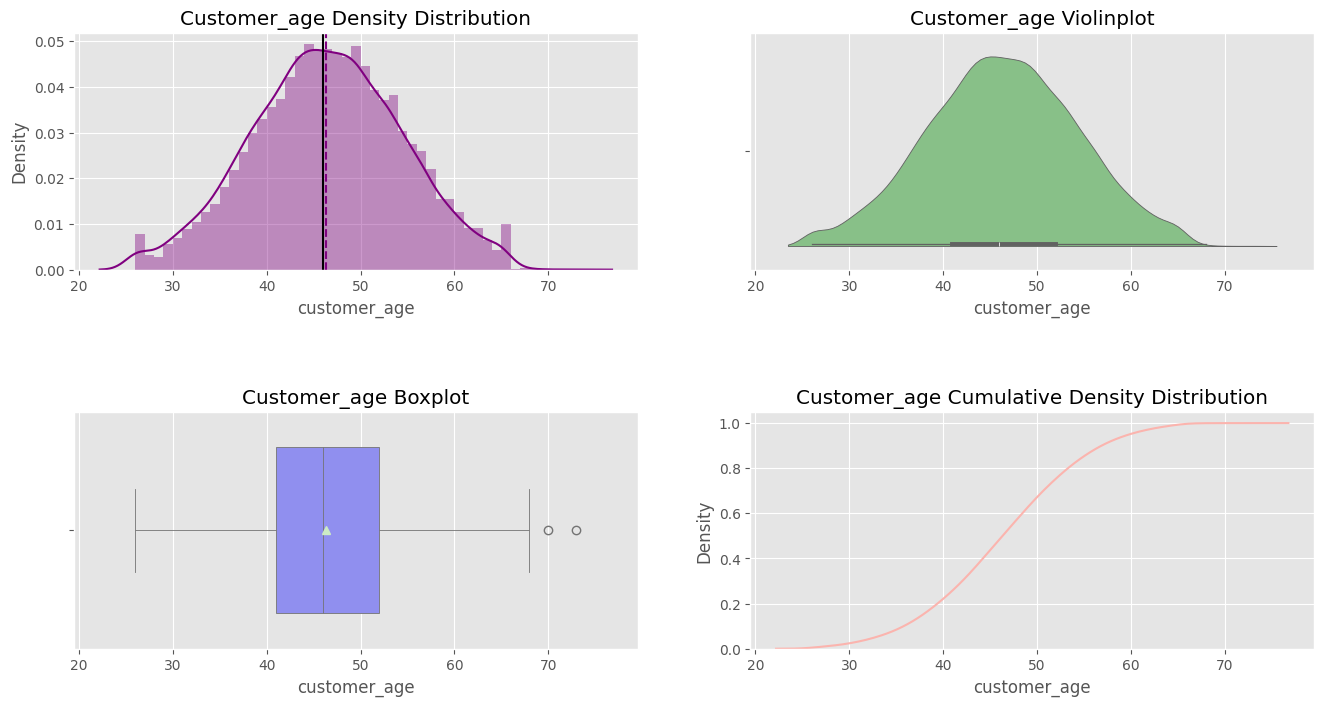

In [ ]:
summary(data, "customer_age")

The Customer_Age data is normally distributed, with only 2 outliers on the right side or higher end.

5 Point Summary of Dependent_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    1 |    2 |    3 |     5 |
+-------+-------+------+------+------+-------+


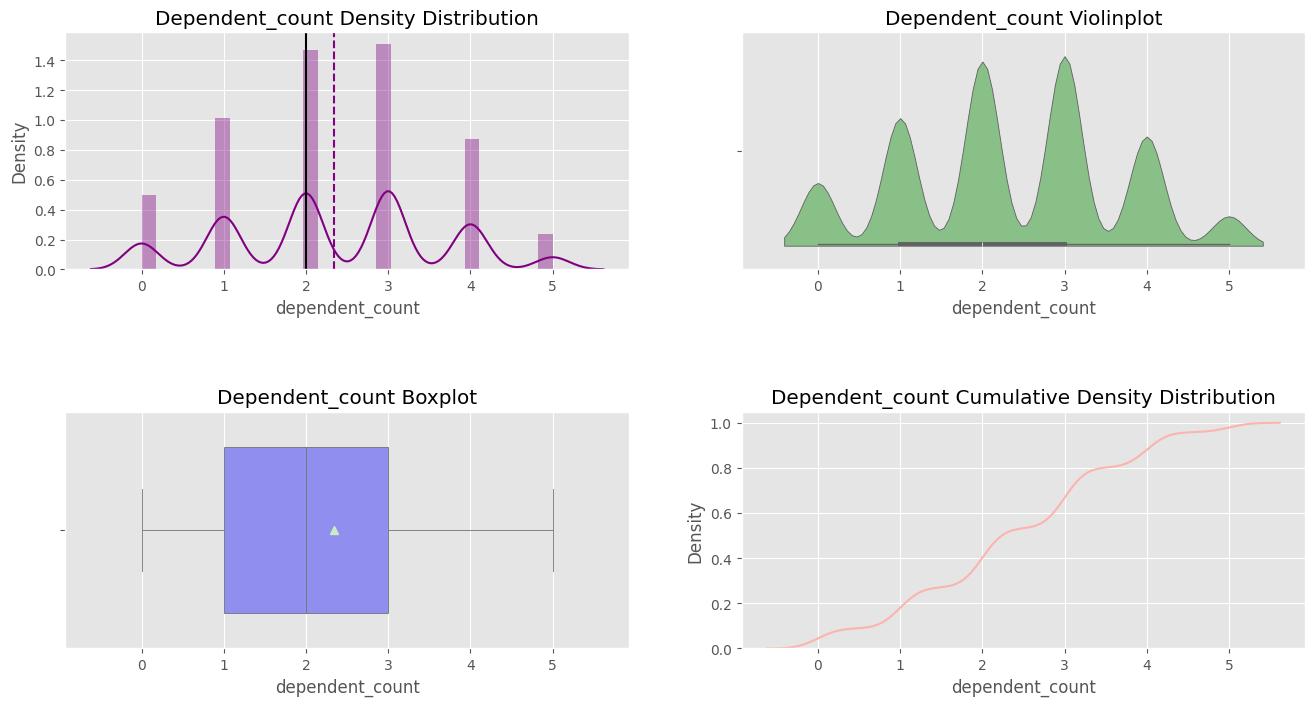

In [ ]:
summary(data, "dependent_count")

Dependent Count is mostly 2 or 3

5 Point Summary of Months_on_book Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    13 |   31 |   36 |   40 |    56 |
+-------+-------+------+------+------+-------+


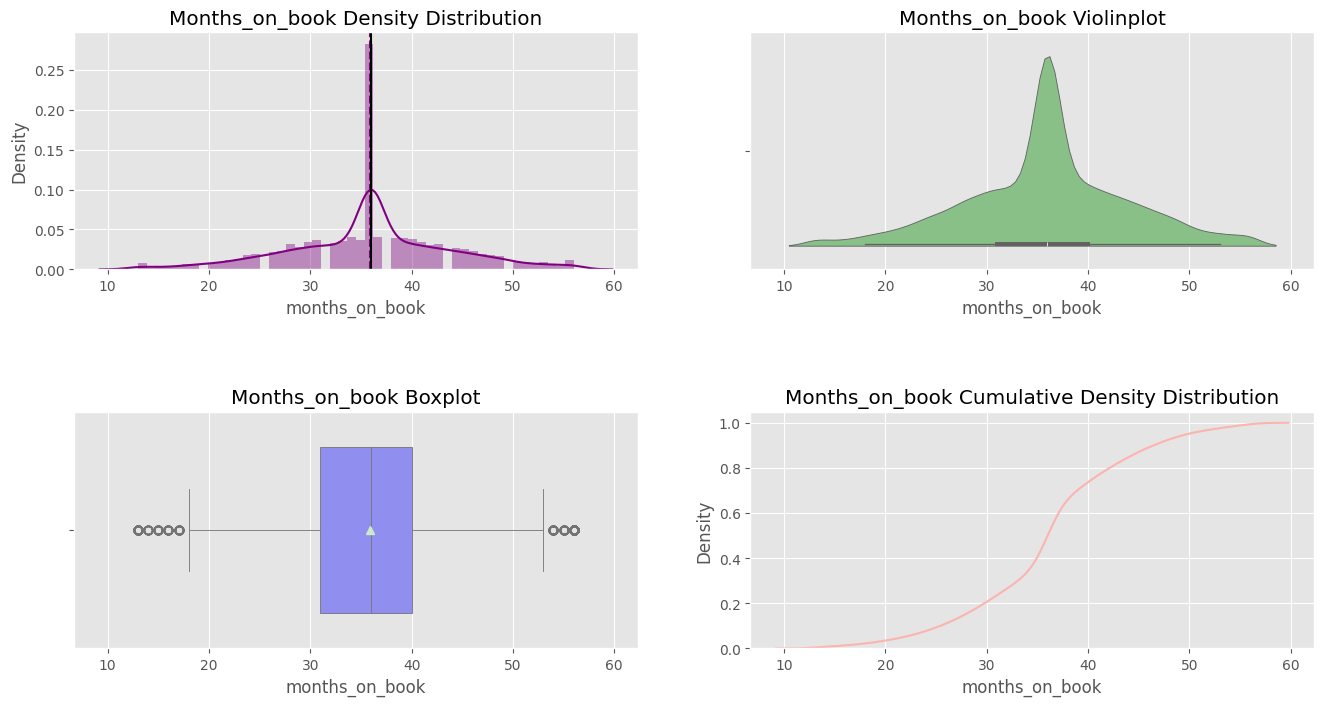

In [ ]:
summary(data, "months_on_book")

Most customers are on the books for 3 years and outliers are on both ends.

5 Point Summary of Total_relationship_count Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     1 |    3 |    4 |    5 |     6 |
+-------+-------+------+------+------+-------+


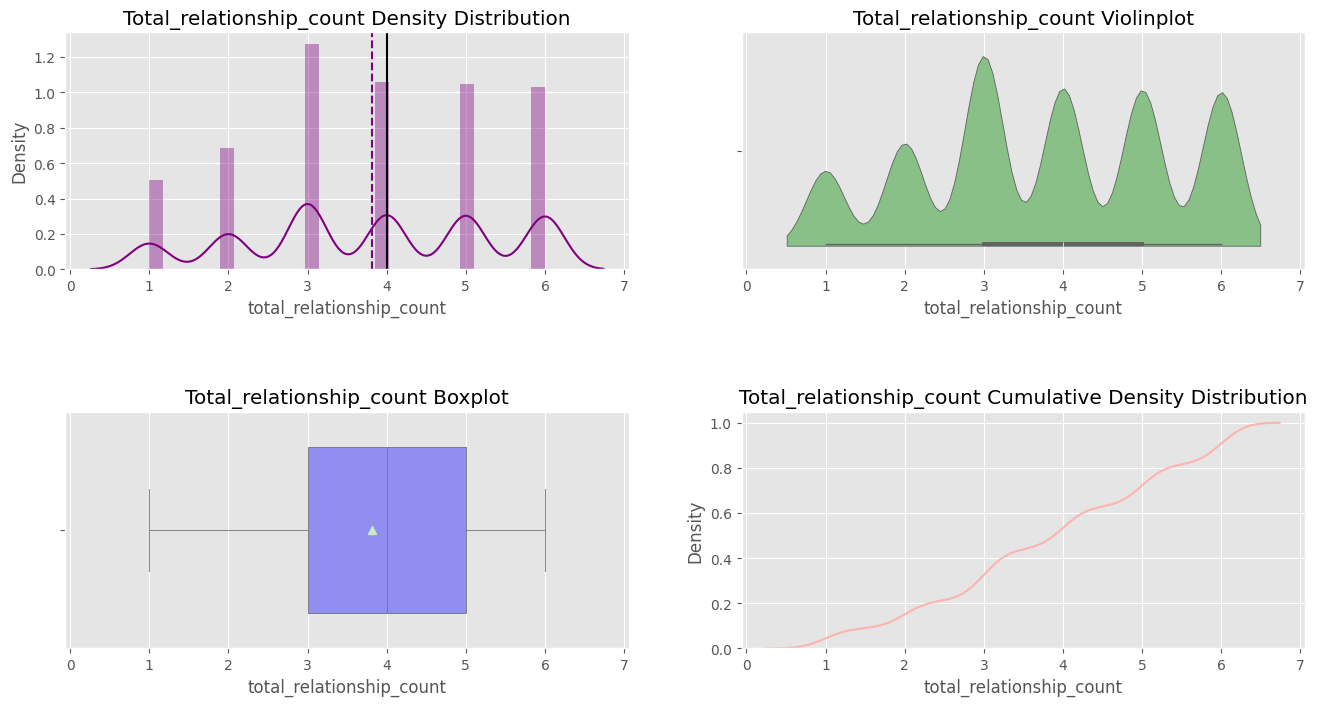

In [ ]:
summary(data, "total_relationship_count")

Most of the customers have 4 or more relations with the bank.



5 Point Summary of Months_inactive_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


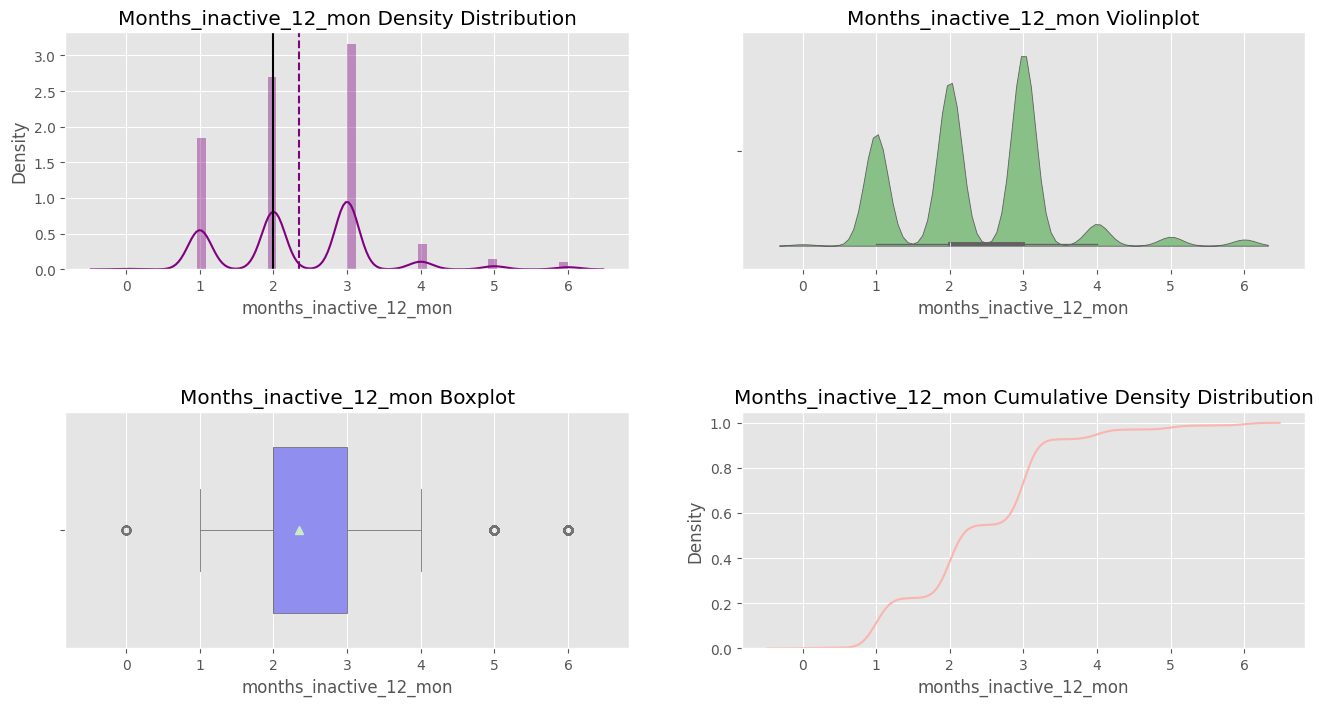

In [ ]:
summary(data, "months_inactive_12_mon")

"Months inactive in last 12 months" have lower and higher end outliers.

0 value means the customer is always active, so not a concern of lower outliers.

More concern is on customers who are inactive for 5 or more months.

5 Point Summary of Contacts_count_12_mon Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |    2 |    2 |    3 |     6 |
+-------+-------+------+------+------+-------+


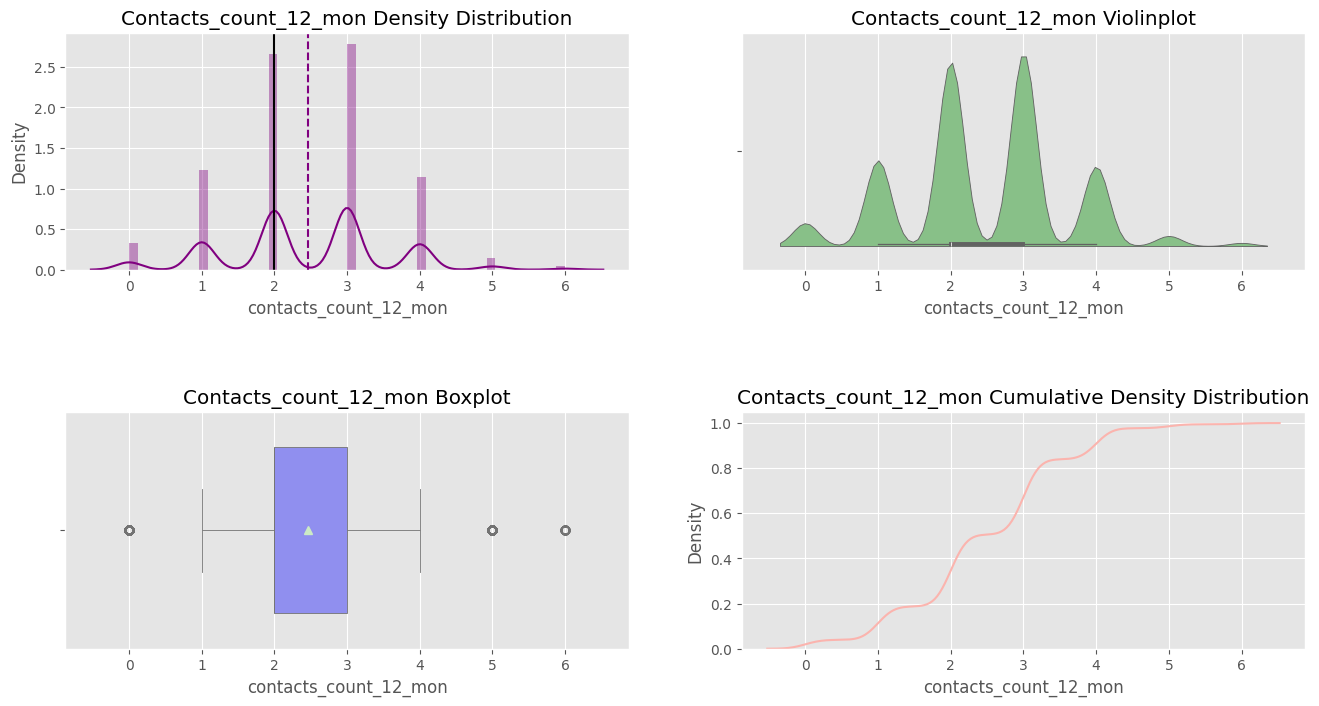

In [ ]:
summary(data, "contacts_count_12_mon")

Lower and higher end outliers are there.

Here less number of contacts between the bank and the customer, which is interesting to be checked for.

5 Point Summary of Credit_limit Attribute:

+-------+--------+------+------+---------+-------+
|       |    Min |   Q1 |   Q2 |      Q3 |   Max |
|-------+--------+------+------+---------+-------|
| Value | 1438.3 | 2555 | 4549 | 11067.5 | 34516 |
+-------+--------+------+------+---------+-------+


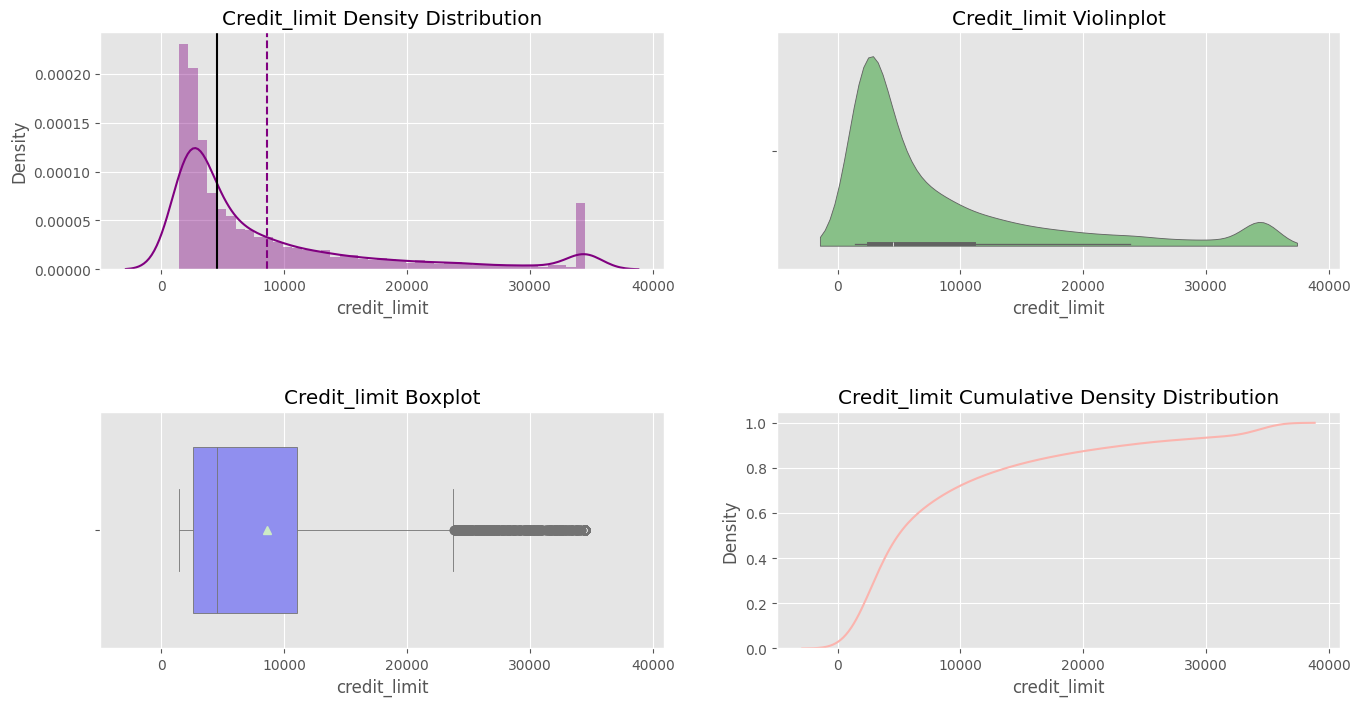

In [ ]:
summary(data, "credit_limit")

Higher end outliers are in Credit Limit. Because the customers are high end.

In [ ]:
data[data["credit_limit"] > 23000]["income_category"].value_counts(normalize=True)


$80K - $120K     0.421
$120K +          0.302
$60K - $80K      0.156
Unknown          0.110
$40K - $60K      0.012
Less than $40K   0.000
Name: income_category, dtype: float64

In [ ]:
data[data["credit_limit"] > 23000]["card_category"].value_counts(normalize=True)

Blue       0.592
Silver     0.310
Gold       0.083
Platinum   0.015
Name: card_category, dtype: float64

The customers with credit limit > 23K have approx. 87% people earning $60K plus, and 90% have Blue or Silver card.

5 Point Summary of Total_revolving_bal Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |     0 |  359 | 1276 | 1784 |  2517 |
+-------+-------+------+------+------+-------+


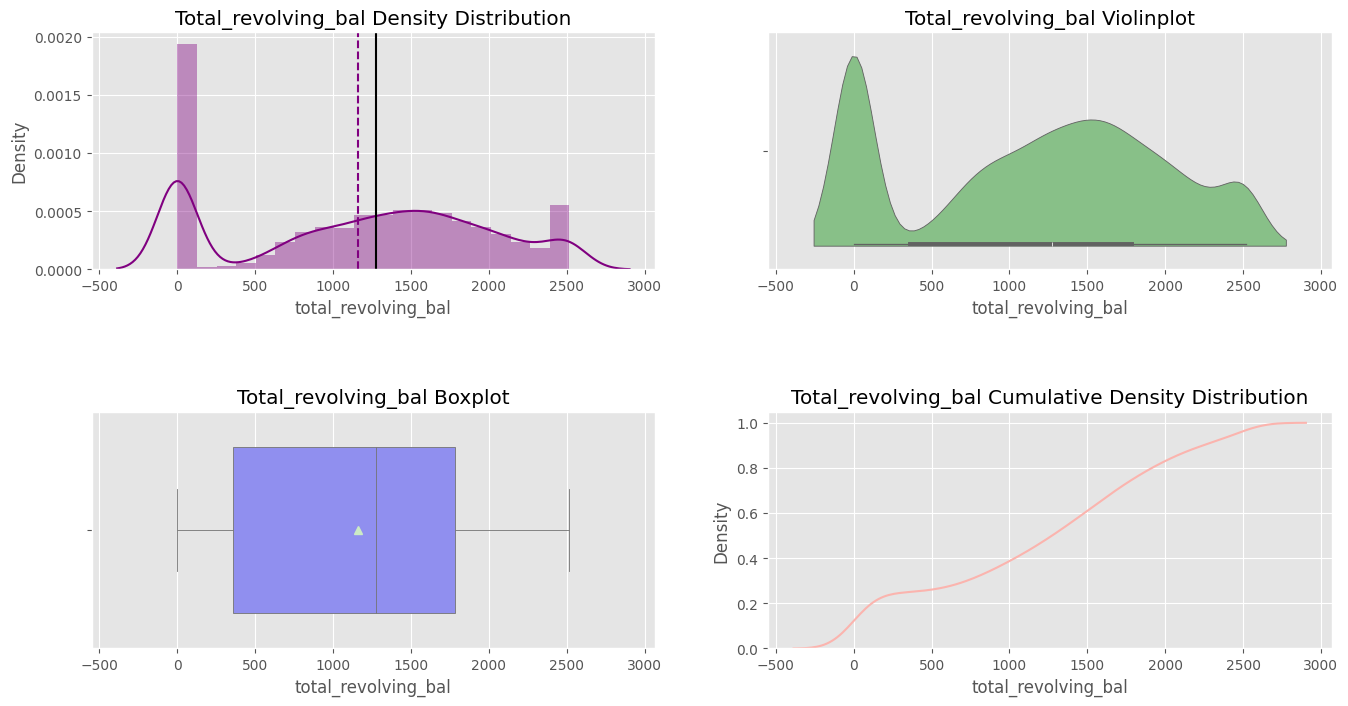

In [ ]:
summary(data, "total_revolving_bal")

Total revolving balance of 0 would mean the customer never uses the credit card

5 Point Summary of Avg_open_to_buy Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |     3 | 1324.5 | 3474 | 9859 | 34516 |
+-------+-------+--------+------+------+-------+


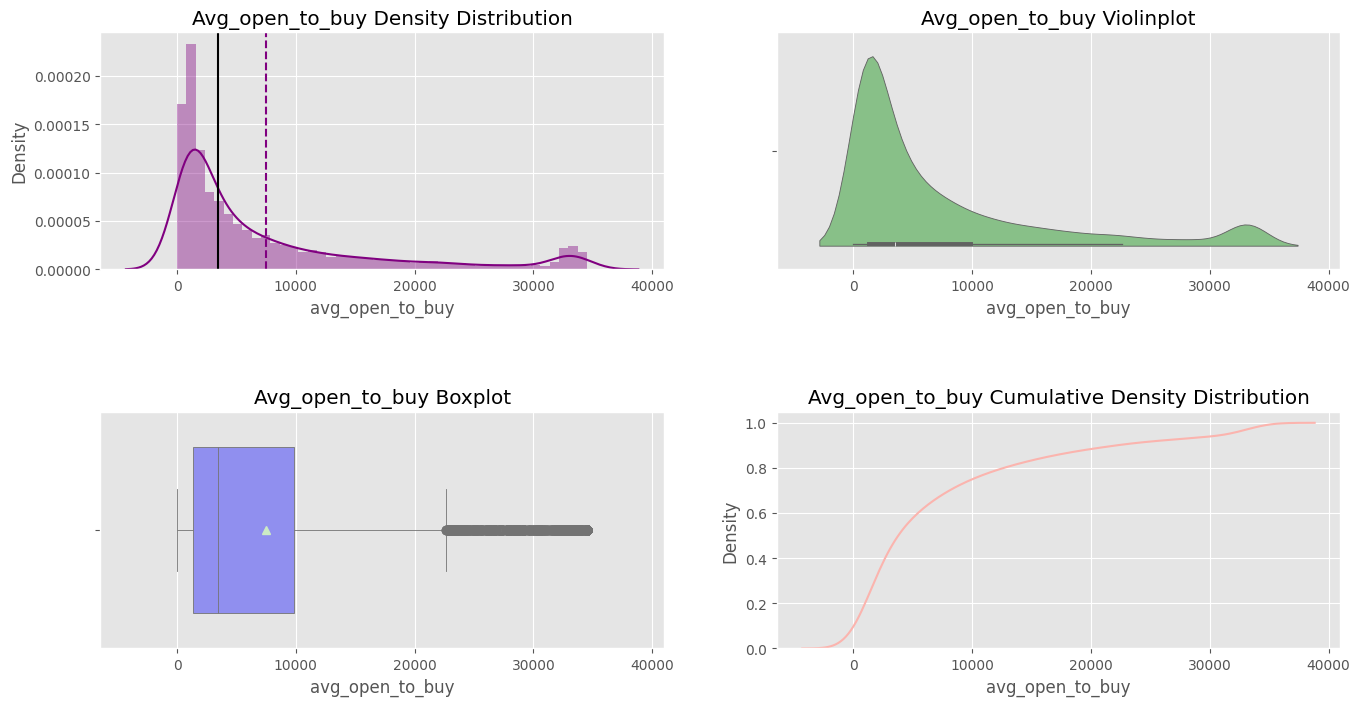

In [ ]:
summary(data, "avg_open_to_buy")

Average Open to Buy has lots of higher end outliers and highly skewed.

That means there are customers who uses only very small amount of their credit limit.



5 Point Summary of Total_amt_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.631 | 0.736 | 0.859 | 3.397 |
+-------+-------+-------+-------+-------+-------+


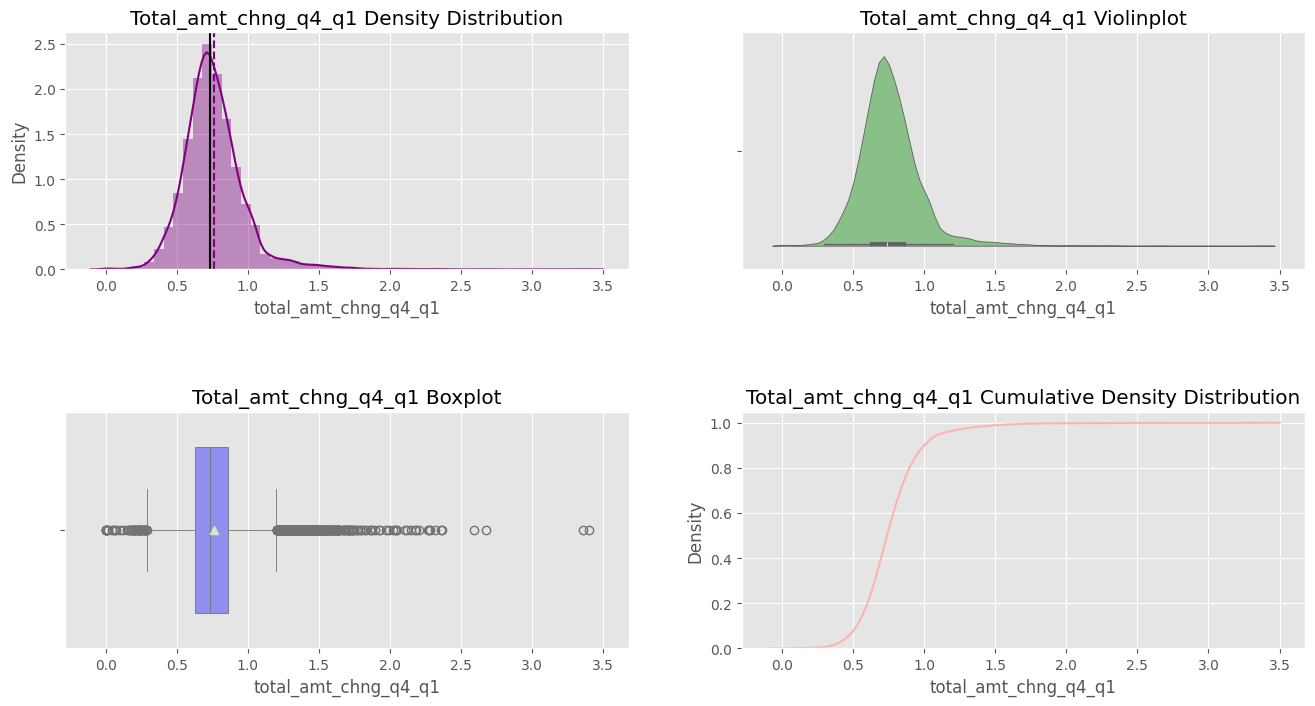

In [ ]:
summary(data, "total_amt_chng_q4_q1")

Outliers are on both ends

5 Point Summary of Total_trans_amt Attribute:

+-------+-------+--------+------+------+-------+
|       |   Min |     Q1 |   Q2 |   Q3 |   Max |
|-------+-------+--------+------+------+-------|
| Value |   510 | 2155.5 | 3899 | 4741 | 18484 |
+-------+-------+--------+------+------+-------+


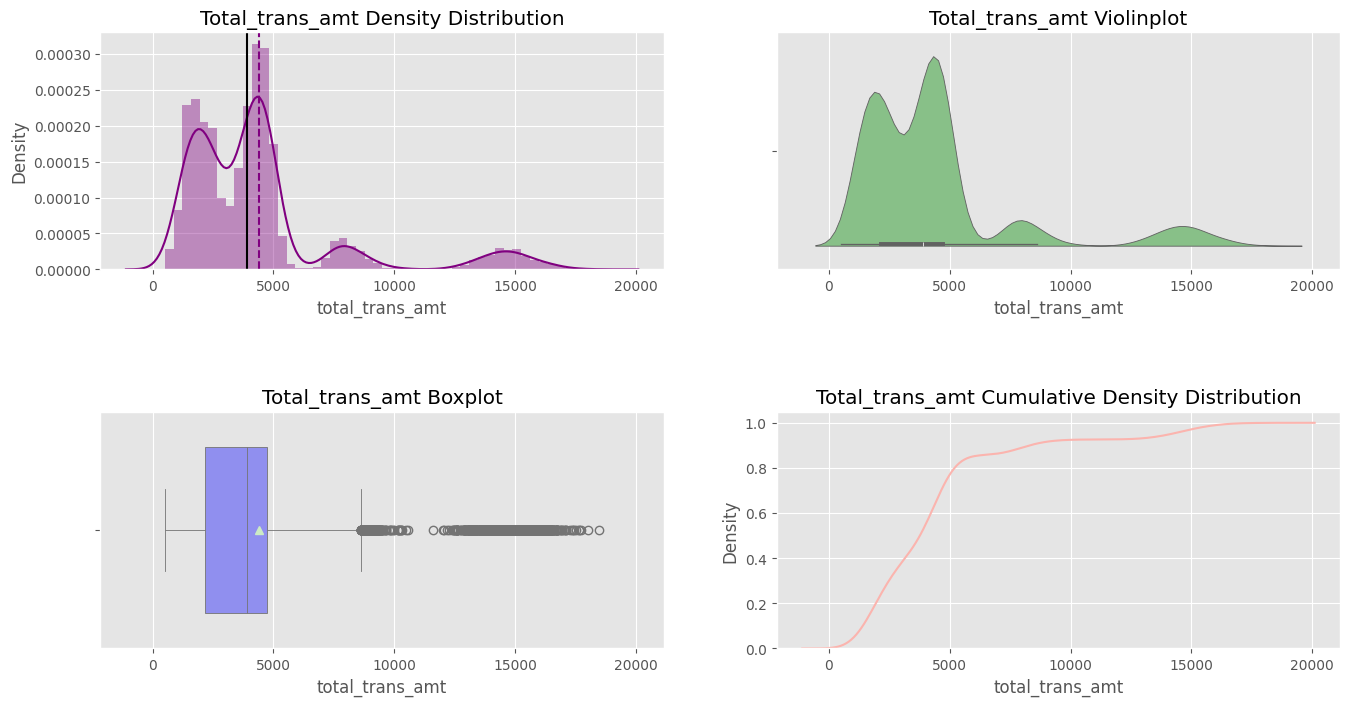

In [ ]:
summary(data, "total_trans_amt")

Data is highly right skewed and have more higher end outliers

5 Point Summary of Total_trans_ct Attribute:

+-------+-------+------+------+------+-------+
|       |   Min |   Q1 |   Q2 |   Q3 |   Max |
|-------+-------+------+------+------+-------|
| Value |    10 |   45 |   67 |   81 |   139 |
+-------+-------+------+------+------+-------+


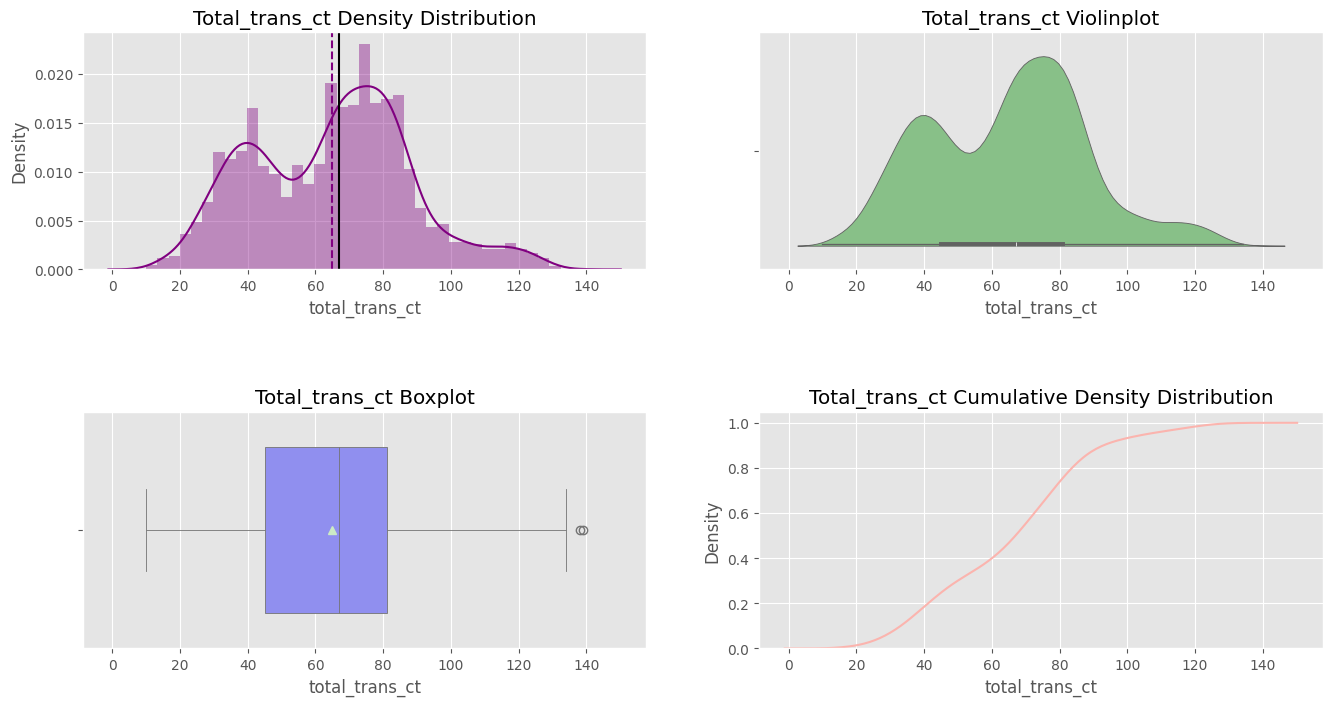

In [ ]:
summary(data, "total_trans_ct")

Total transaction count of customers for the last 12 months

5 Point Summary of Total_ct_chng_q4_q1 Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.582 | 0.702 | 0.818 | 3.714 |
+-------+-------+-------+-------+-------+-------+


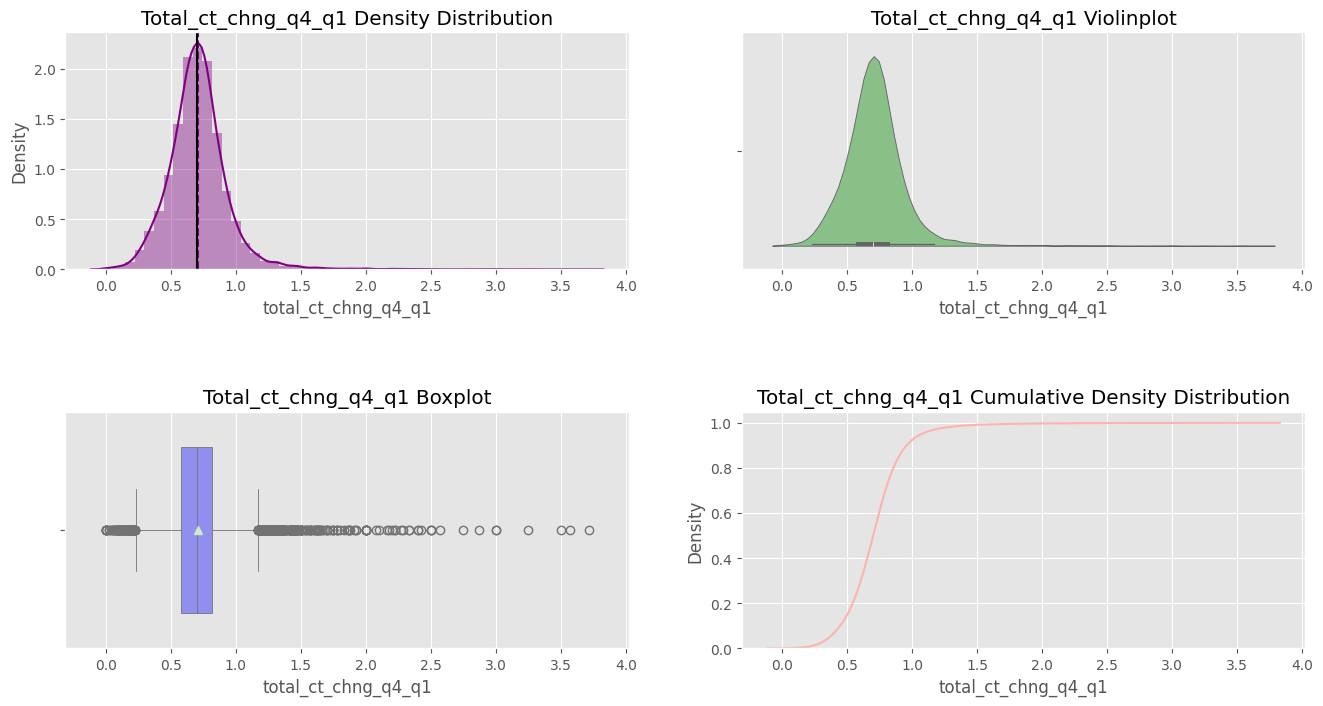

In [ ]:
summary(data, "total_ct_chng_q4_q1")

Tortal change in Transacction Count has outliers on both ends.

5 Point Summary of Avg_utilization_ratio Attribute:

+-------+-------+-------+-------+-------+-------+
|       |   Min |    Q1 |    Q2 |    Q3 |   Max |
|-------+-------+-------+-------+-------+-------|
| Value |     0 | 0.023 | 0.176 | 0.503 | 0.999 |
+-------+-------+-------+-------+-------+-------+


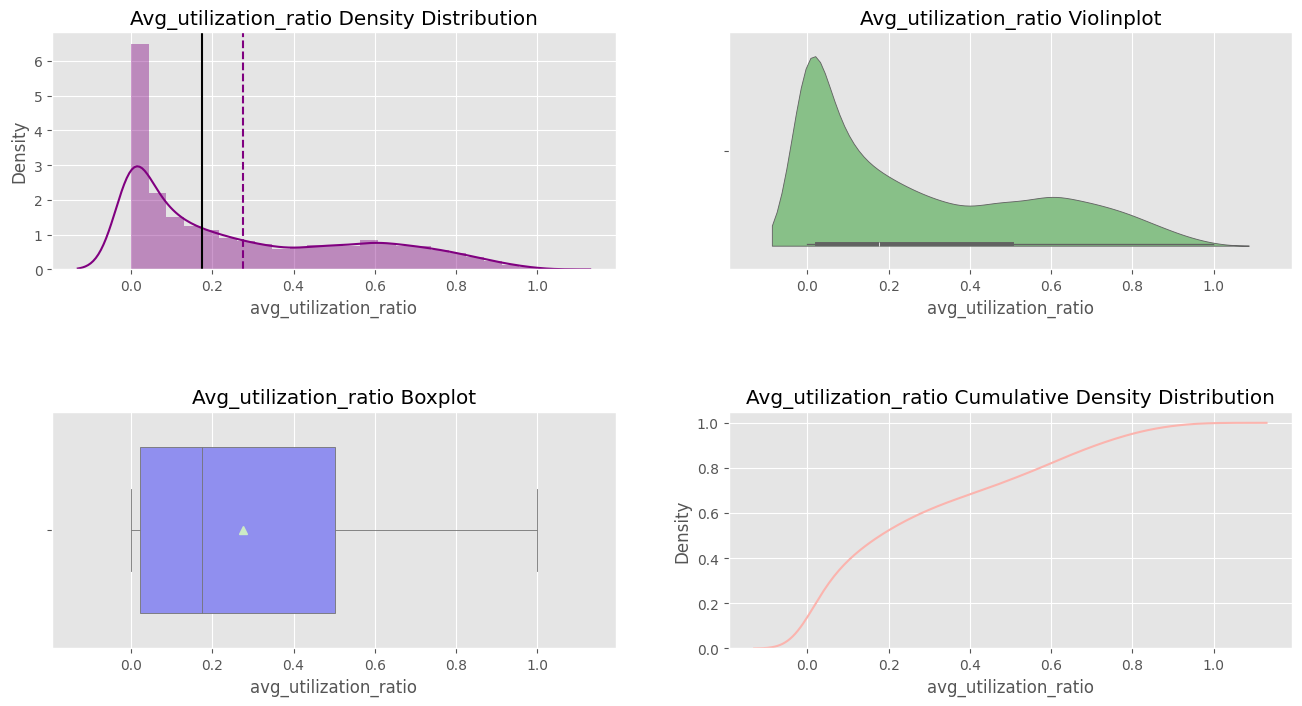

In [ ]:
summary(data, "avg_utilization_ratio")

Average utilization is right skewed.

**Bar chart for Categorical Features (%)**

It is always best to analyze For the categorical variables with percentage of total on bar charts.

Below function takes a category column as input and plots bar chart with percentages on top of each bar.

In [ ]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(df, ['customer_age'], 'prodtaken')
    '''

    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order
        ax=sns.countplot(data=data, x=col, palette = 'crest', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')

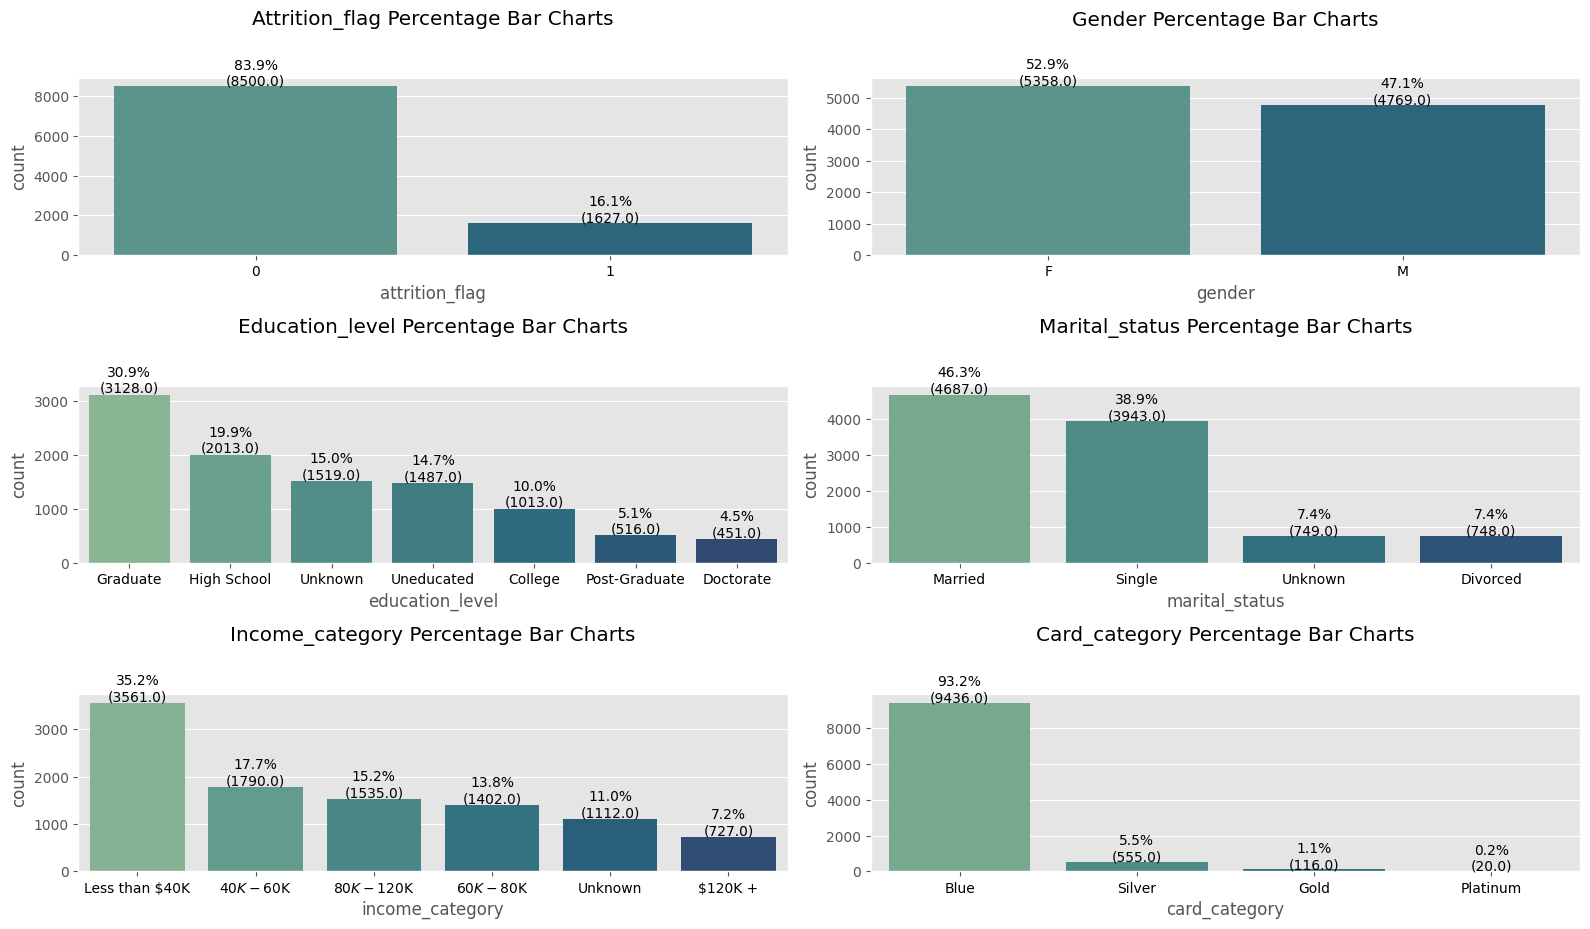

In [ ]:
category_columns = data.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(data, category_columns, target_variable)

High Imbalance in data since the existing vs. attrited customers ratio is 84:16

Data is almost equally distributed between Males and Females
31% customers are Graduate

~85% customers are either Single or Married, where 46.7% of the customers are Married

35% customers earn less than USD 40k and 36% earns USD 60k or more
~93% customers have Blue card

#### Bi-variate Analysis

Bi-variate analysis is to find inter-dependencies between features.

In [ ]:
def box_by_target(data: pd.DataFrame, numeric_columns, target, include_outliers):
    """
    The function takes a category column, target column, and whether to include outliers or not as input
    and plots bar chart with percentages on top of each bar

    Usage:
    ------

    perc_on_bar(['age'], 'prodtaken', True)
    """
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="Blues",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

**With outliers**

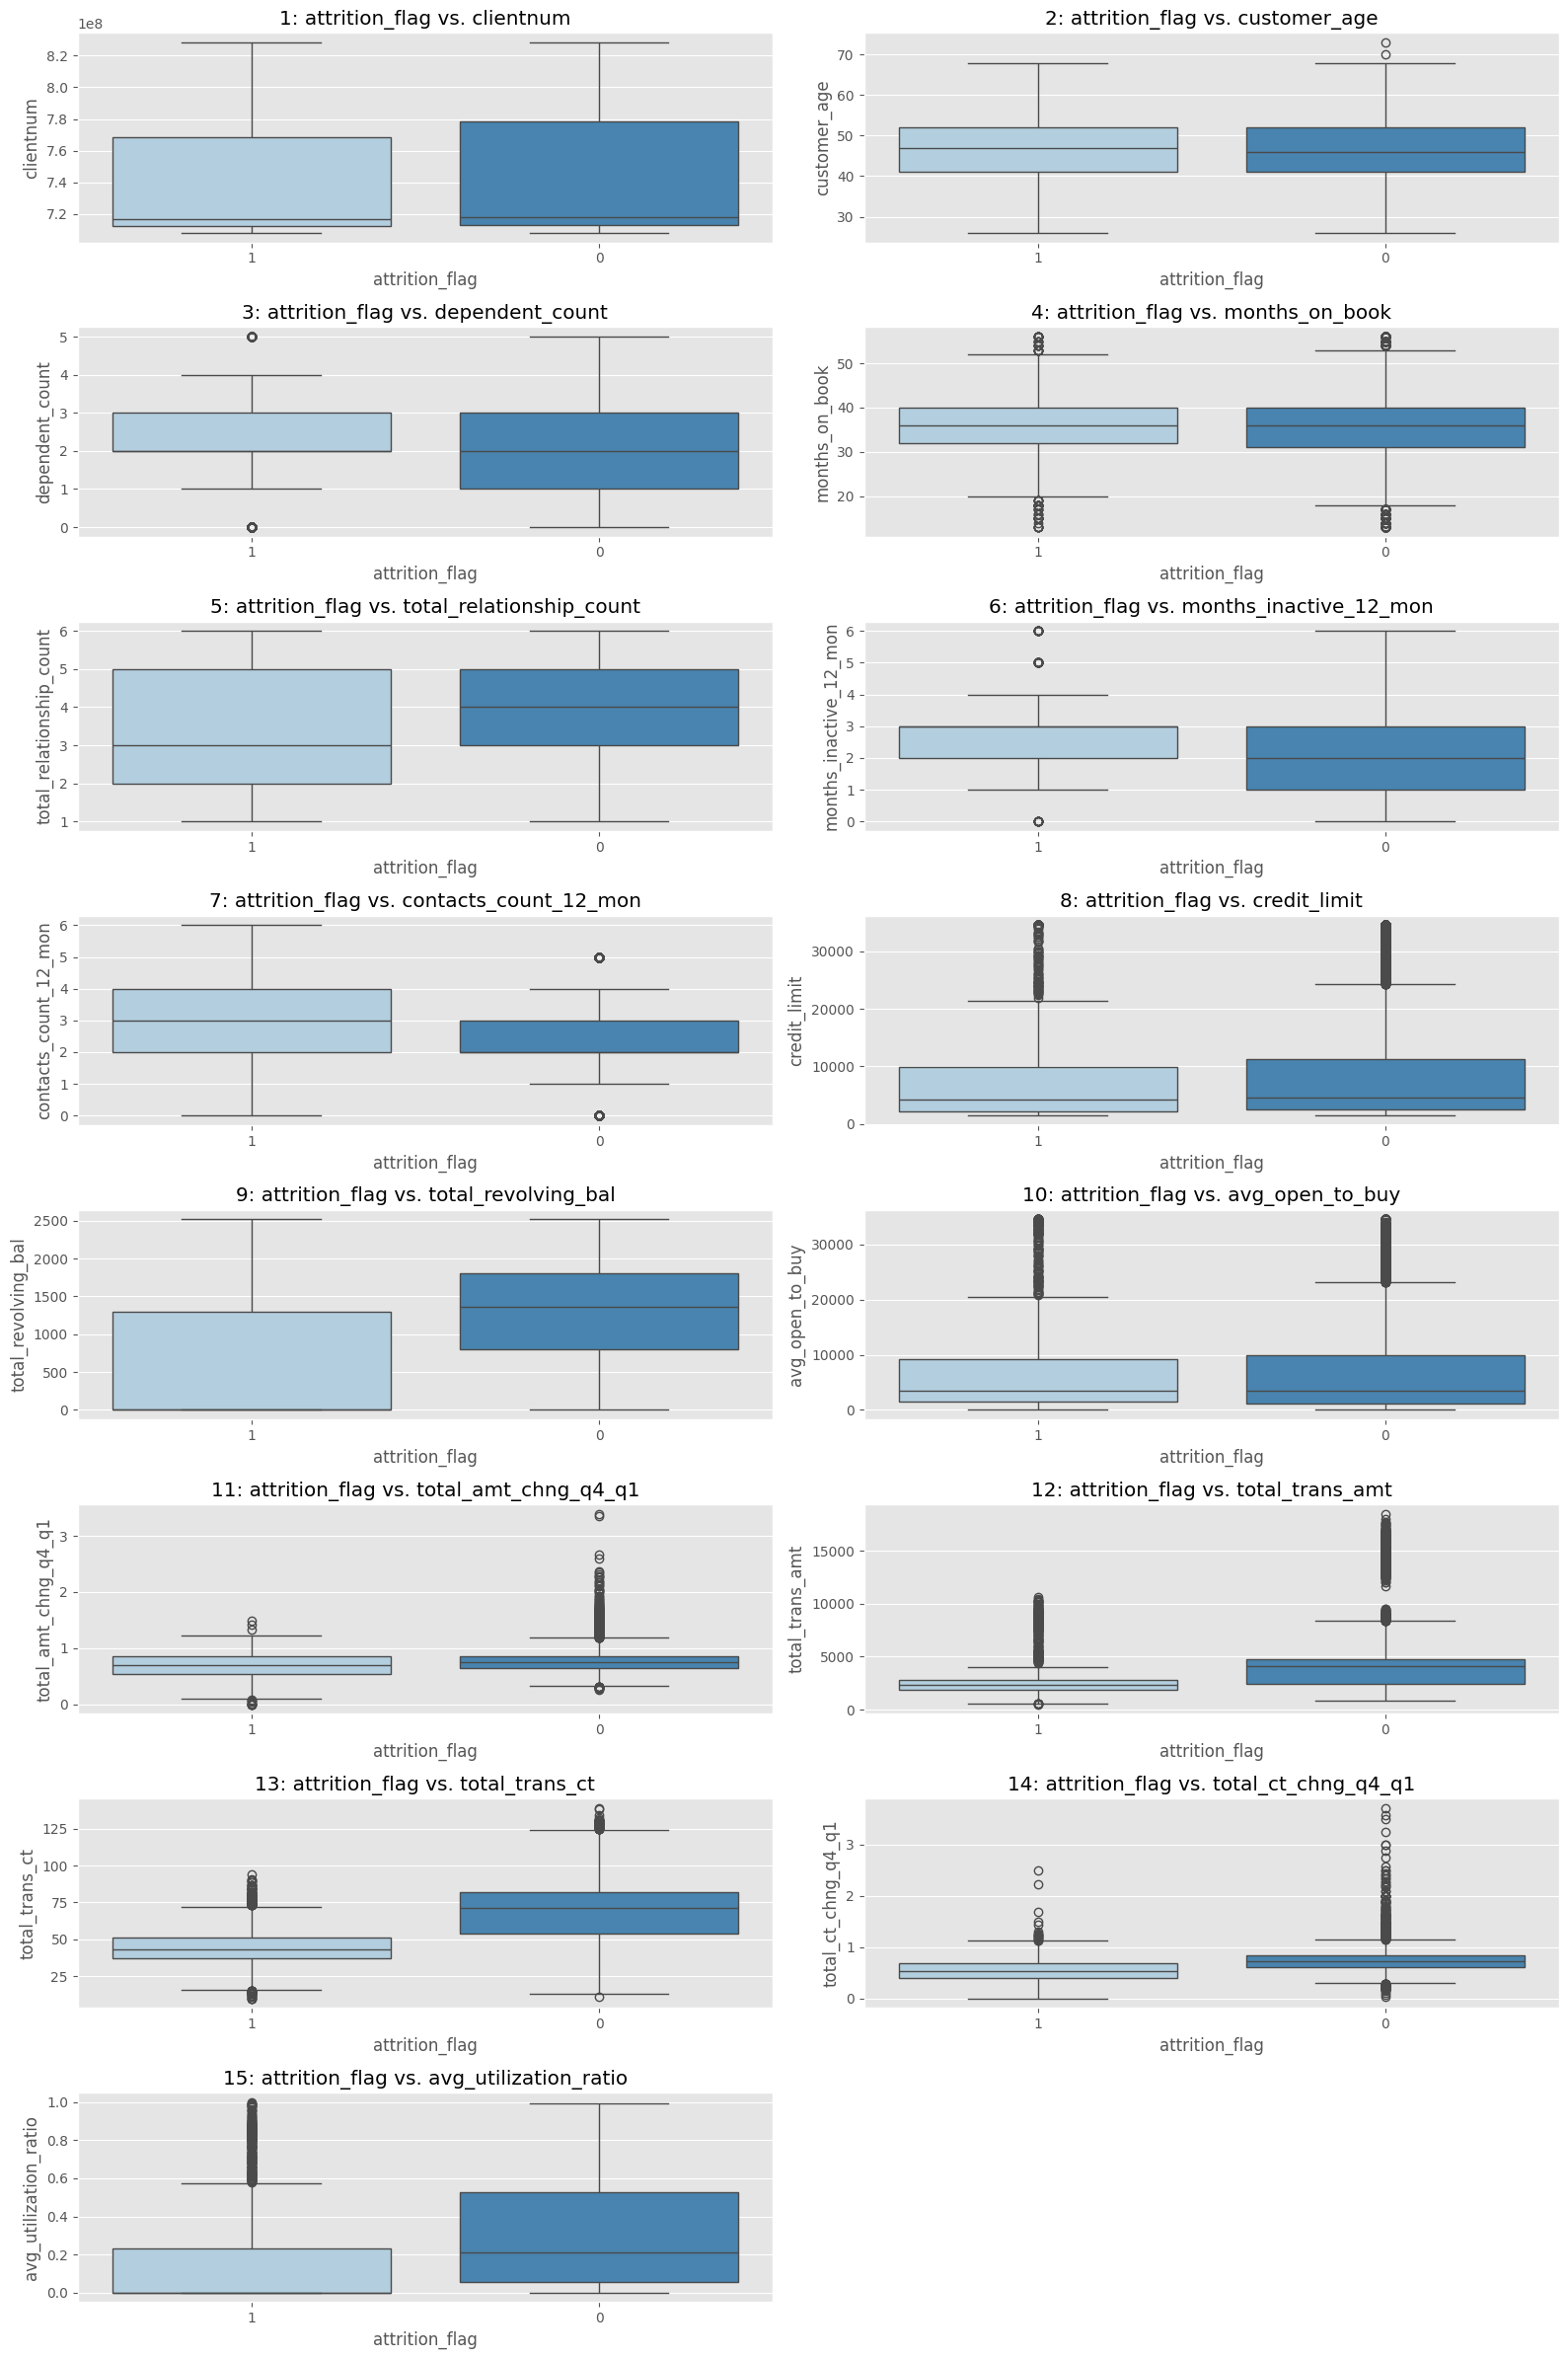

In [ ]:
numeric_columns = data.select_dtypes(exclude="category").columns.tolist()
target_variable = "attrition_flag"
box_by_target(data, numeric_columns, target_variable, True)

**Without outliers**

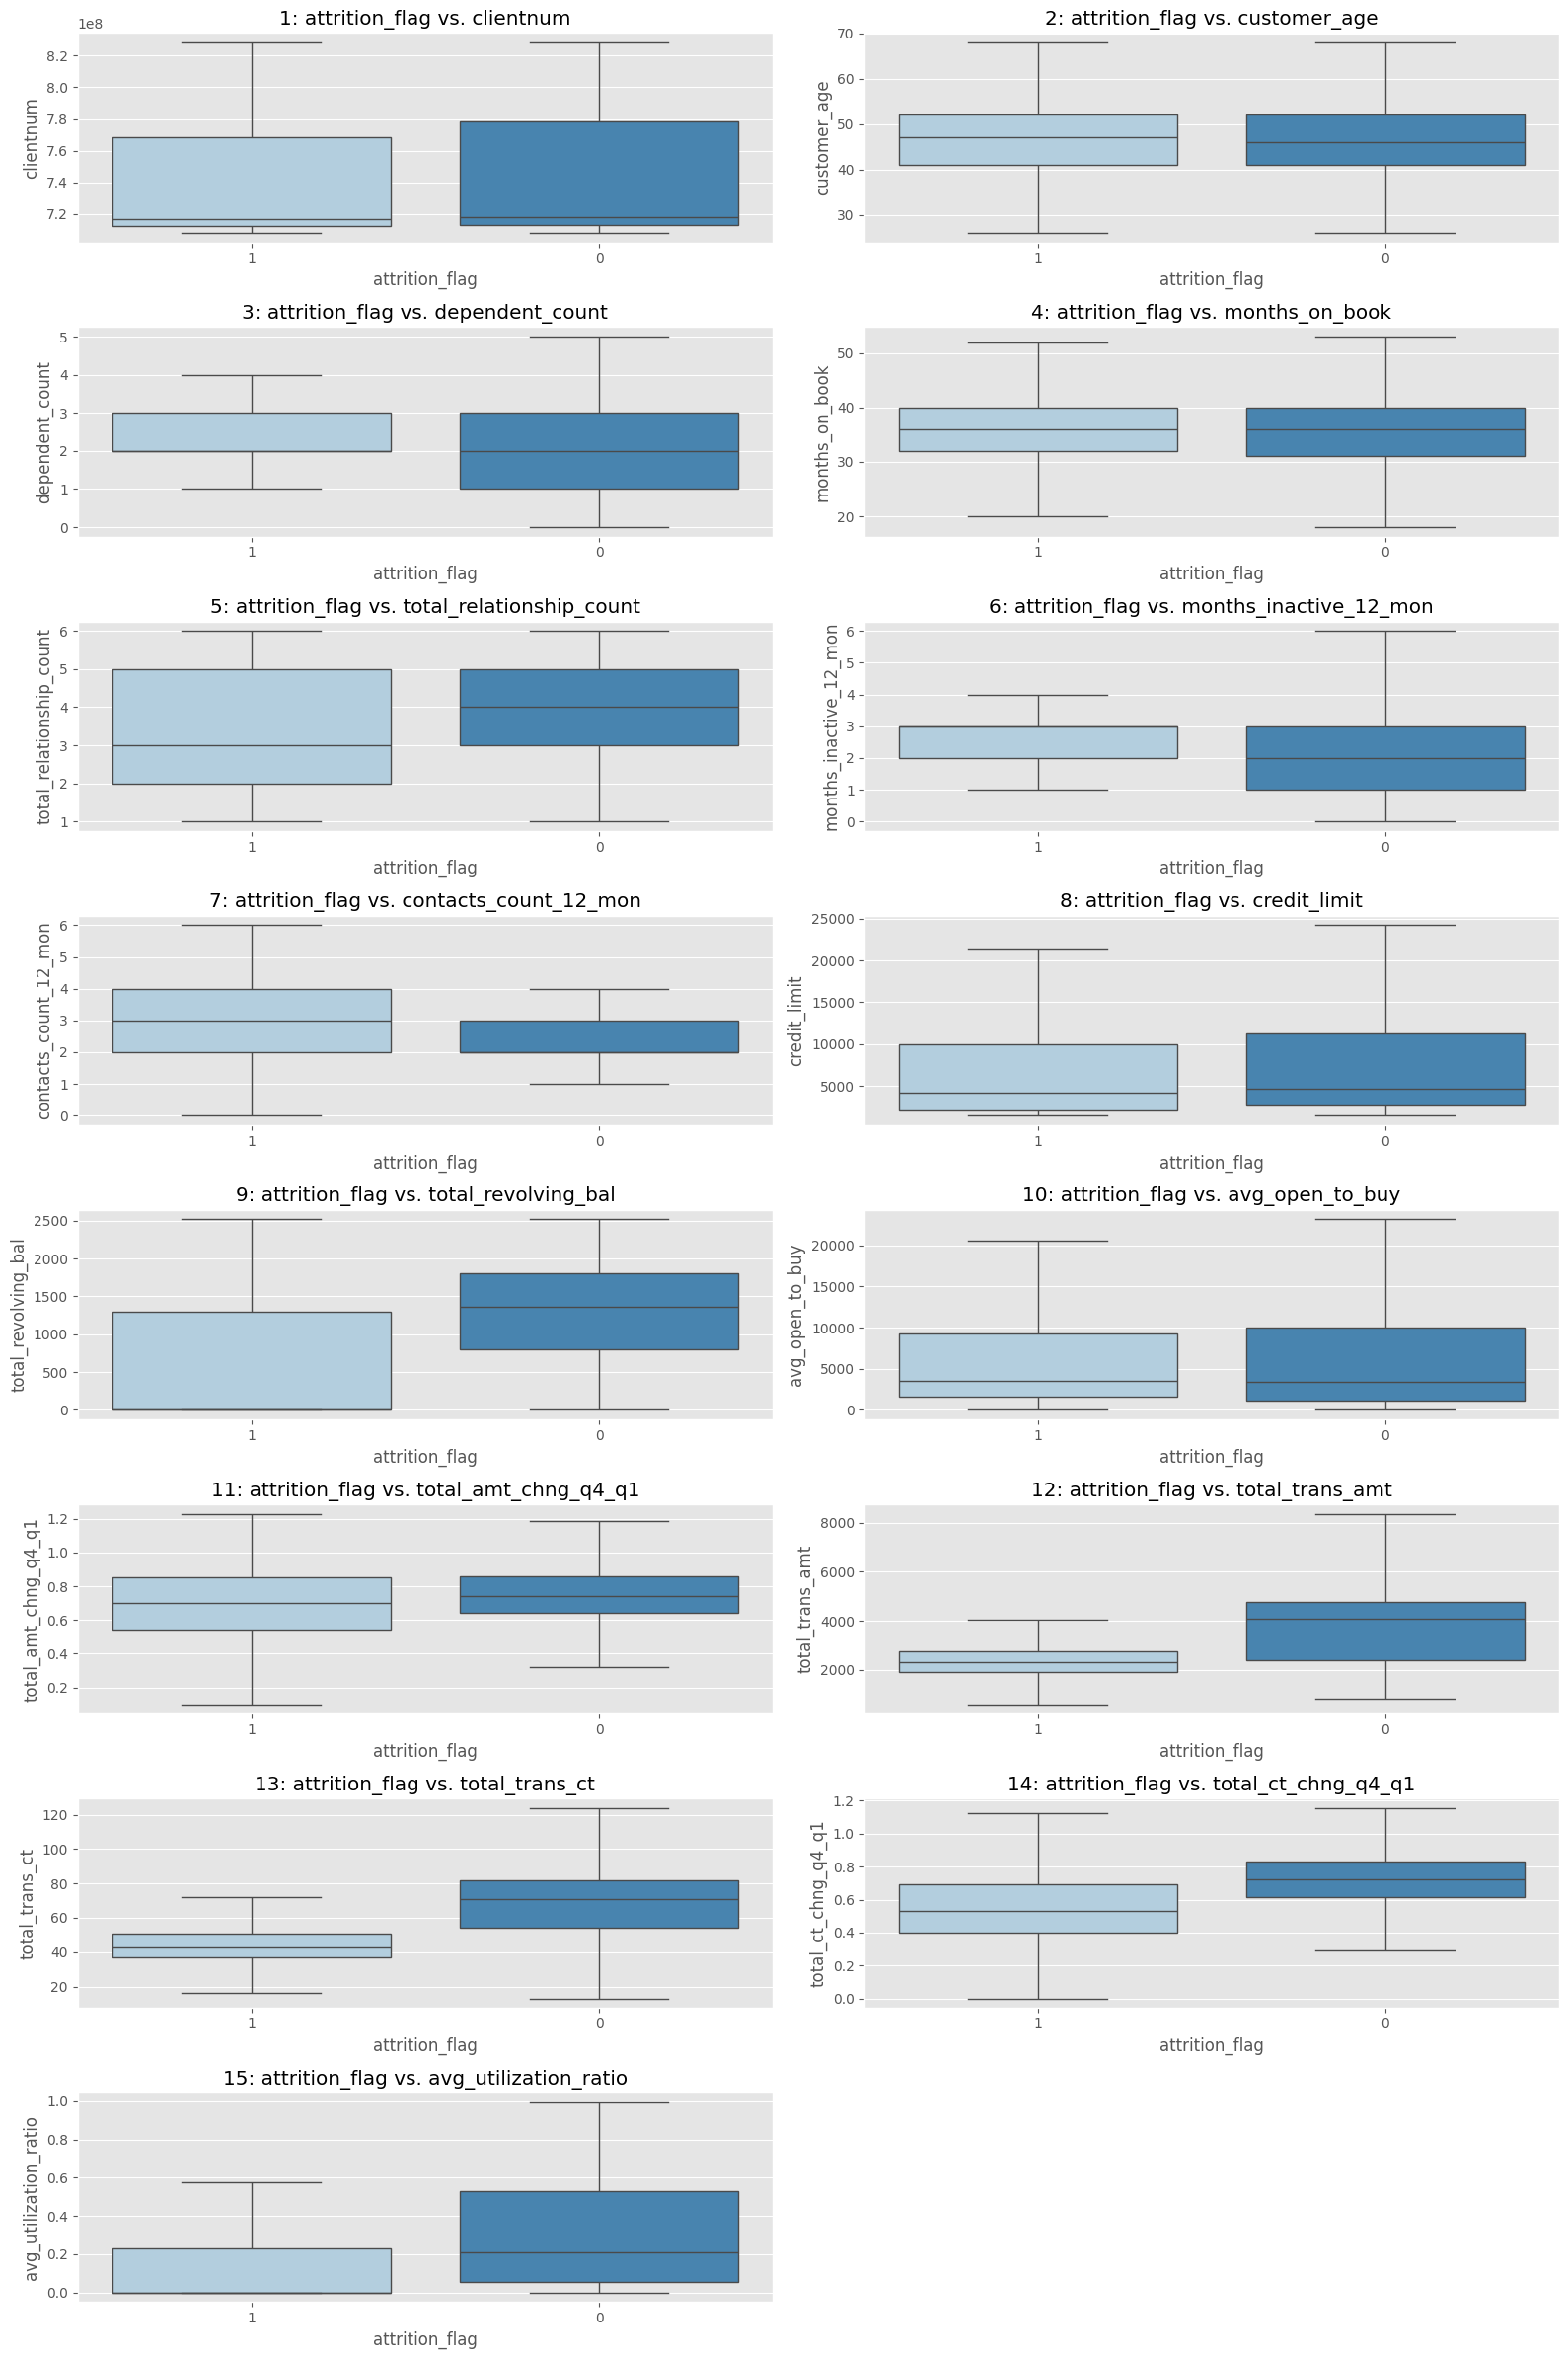

In [ ]:
box_by_target(data, numeric_columns, target_variable, False)

Attrited customers have:

Lower total transaction amount

Lower total transaction count

Lower utilization ratio

Lower transaction count change Q4 to Q1

Bank contacted them Higher number of times

**Target vs. All Categorical Columns**

In [ ]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(df: pd.DataFrame, x, target):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm

    color1 = cm.inferno(np.linspace(0.4, 0.8, 30))
    color2 = cm.viridis(np.linspace(0.4, 0.8, 30))
    sns.set_palette("cubehelix")
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))

    """
    Draw a Pie Chart on first subplot.
    """
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct / 100.0 * np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax[0].pie(
        mydata_values,
        autopct=lambda pct: func(pct, mydata_values),
        textprops=dict(color="w"),
    )

    ax[0].legend(
        wedges,
        mydata_index,
        title=x.capitalize(),
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
    )

    plt.setp(autotexts, size=12)

    ax[0].set_title(f"{x.capitalize()} Pie Chart")

    """
    Draw a Bar Graph on second subplot.
    """

    df = pd.pivot_table(
        data, index=[x], columns=[target], values=["credit_limit"], aggfunc=len
    )

    labels = df.index.tolist()
    no = df.values[:, 1].tolist()
    yes = df.values[:, 0].tolist()

    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(
        l - width / 2, no, width, label="Existing Customer", color=color1
    )
    rects2 = ax[1].bar(
        l + width / 2, yes, width, label="Attrited Customer", color=color2
    )

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel("Scores")
    ax[1].set_title(f"{x.capitalize()} Bar Graph")
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()

    def autolabel(rects):

        """Attach a text label above each bar in *rects*, displaying its height."""

        for rect in rects:
            height = rect.get_height()
            ax[1].annotate(
                "{}".format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                fontsize="medium",
                ha="center",
                va="bottom",
            )

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    """
    Draw a Stacked Bar Graph on bottom.
    """

    sns.set(palette="tab10")
    tab = pd.crosstab(data[x], data[target], normalize="index")

    tab.plot.bar(stacked=True, figsize=(16, 3))
    plt.title(x.capitalize() + " Stacked Bar Plot")
    plt.legend(loc="upper right", bbox_to_anchor=(0, 1))
    plt.show()

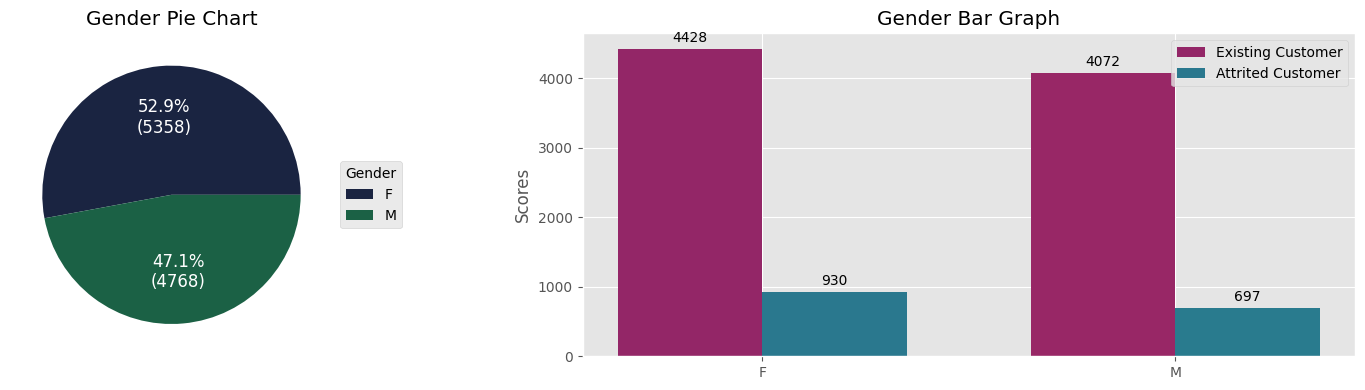

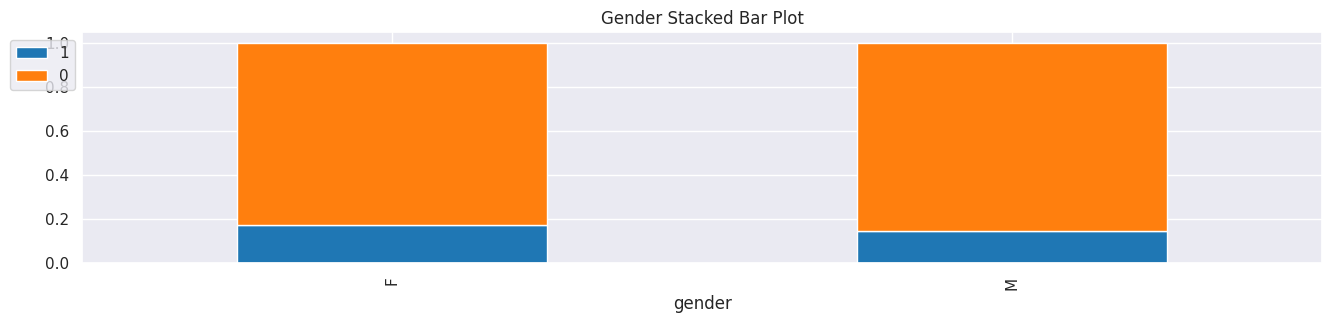

In [ ]:
cat_view(data, "gender", "attrition_flag")

Attrition doesn't seem to be related with Gender

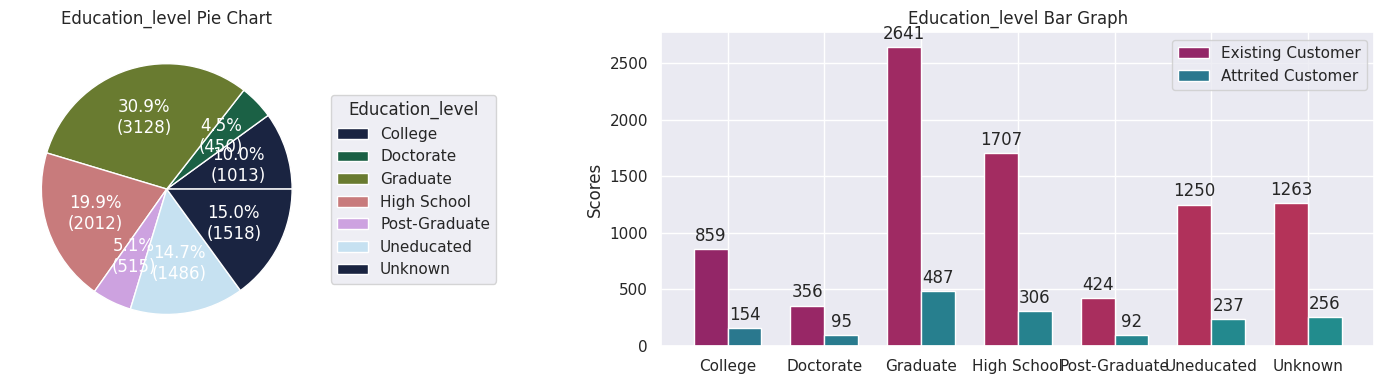

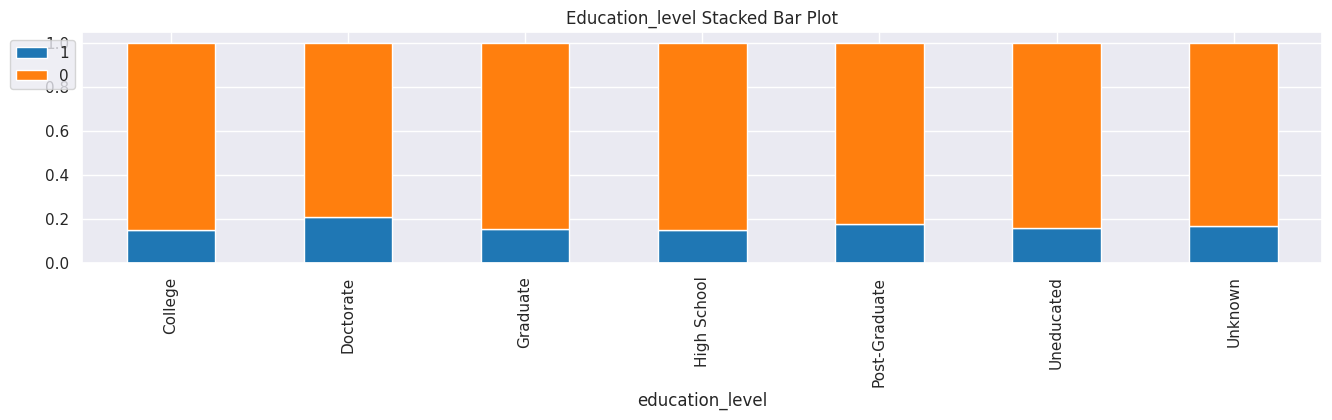

In [ ]:
cat_view(data, "education_level", "attrition_flag")

Attrition doesn't seem to be related with Education as well.

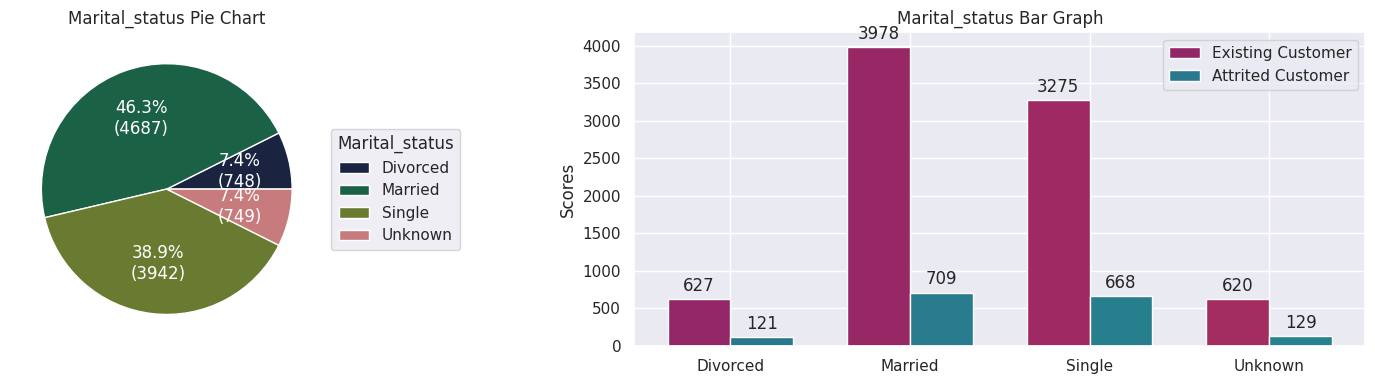

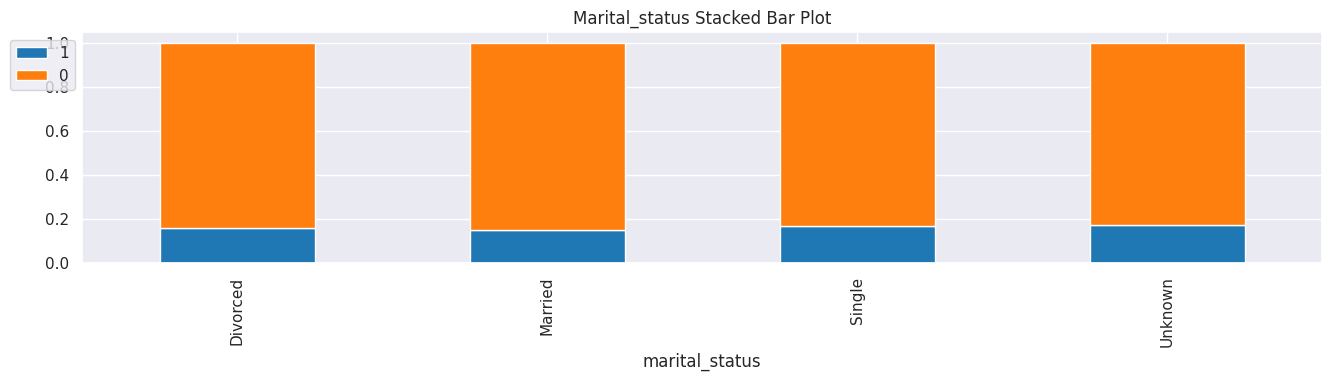

In [ ]:
cat_view(data, "marital_status", "attrition_flag")

Attrition doesn't seem to be related with Marital Status

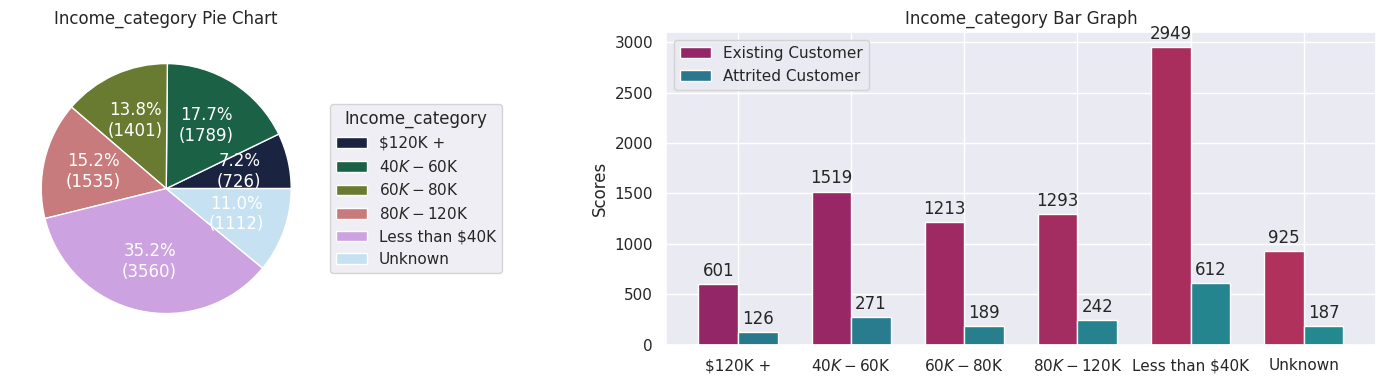

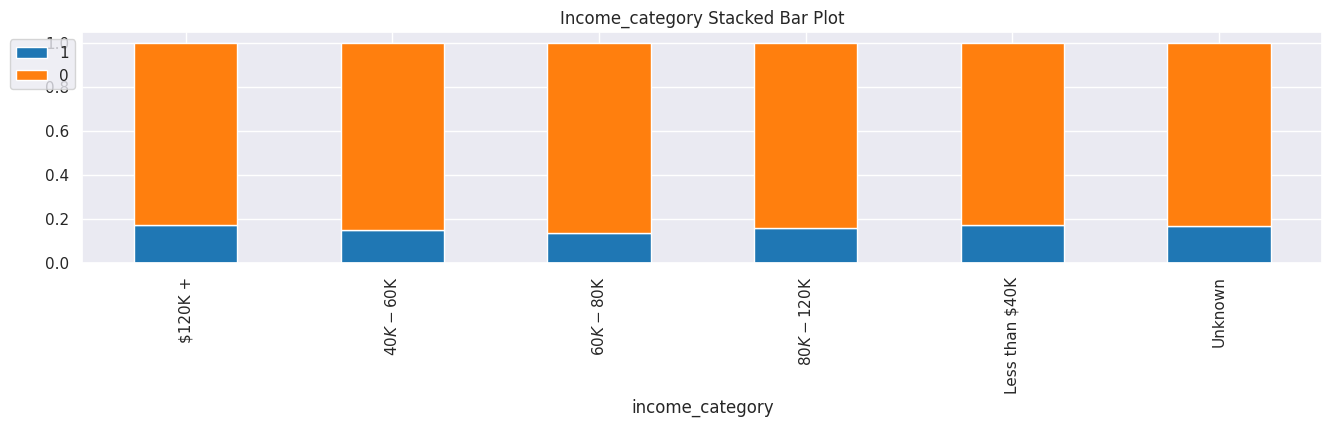

In [ ]:
cat_view(data, "income_category", "attrition_flag")

Attrition does not seem to be related with Income Category.

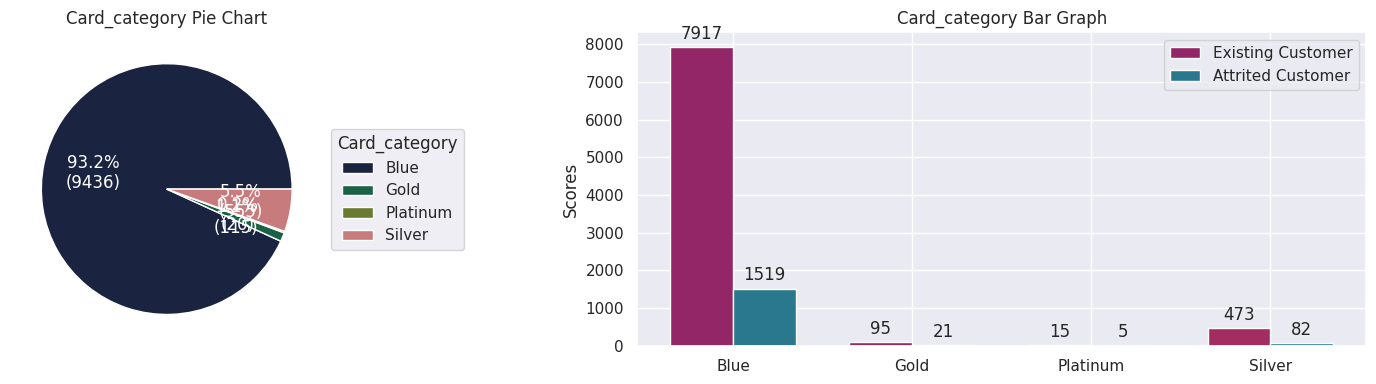

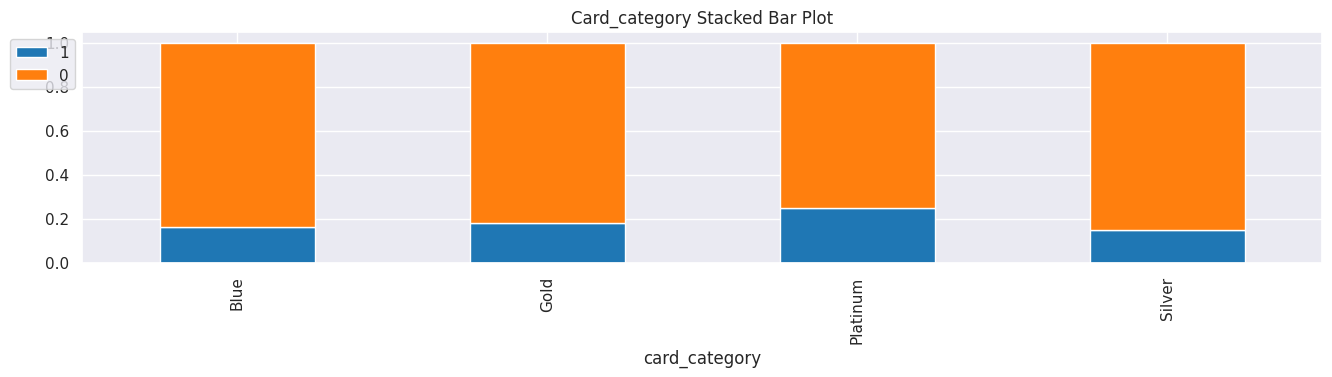

In [ ]:
cat_view(data, "card_category", "attrition_flag")

Platinum card holders seem to be having attrition tendency. However, there are only 20 data points for platinum card holders, could be biased.

#### Multi-variate Plots

Pairplot of all available numeric columns, hued by Personal Loan

<Figure size 2000x2000 with 0 Axes>

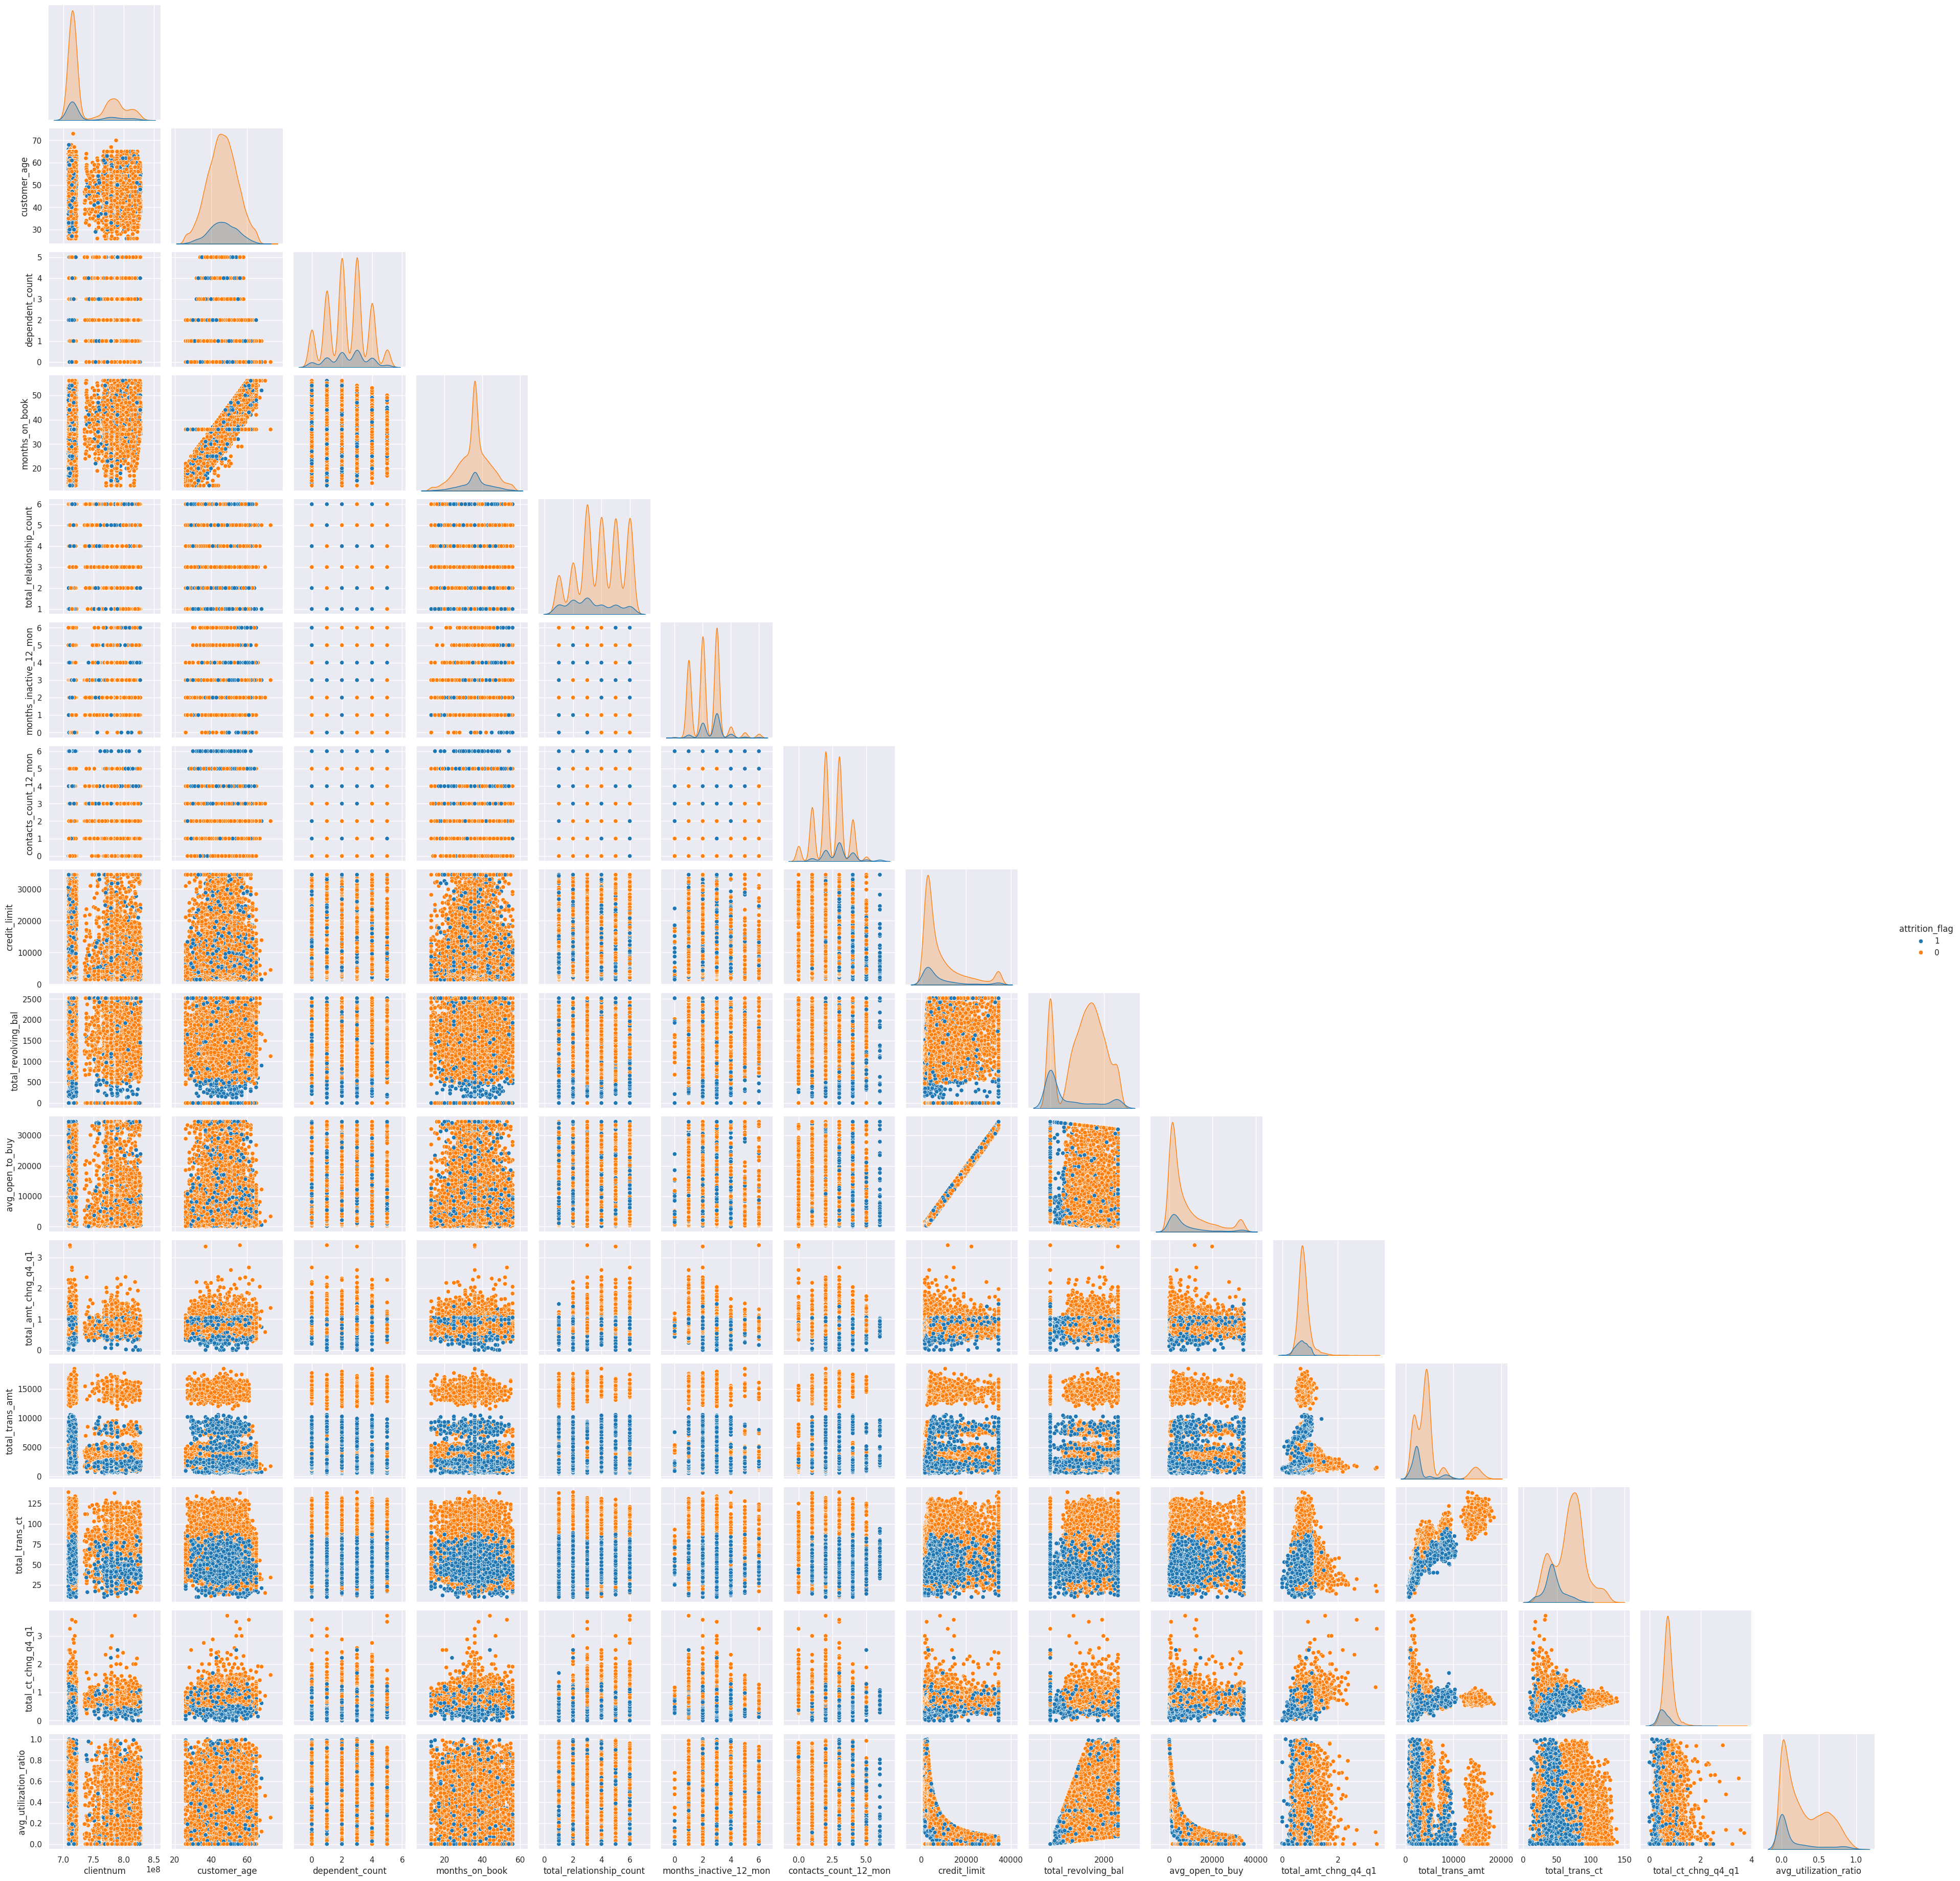

In [101]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20, 20))
sns.color_palette("Spectral", as_cmap=True)
sns.pairplot(data=data, hue="attrition_flag", corner=True)

There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1.

**Heatmap to check Correlation**

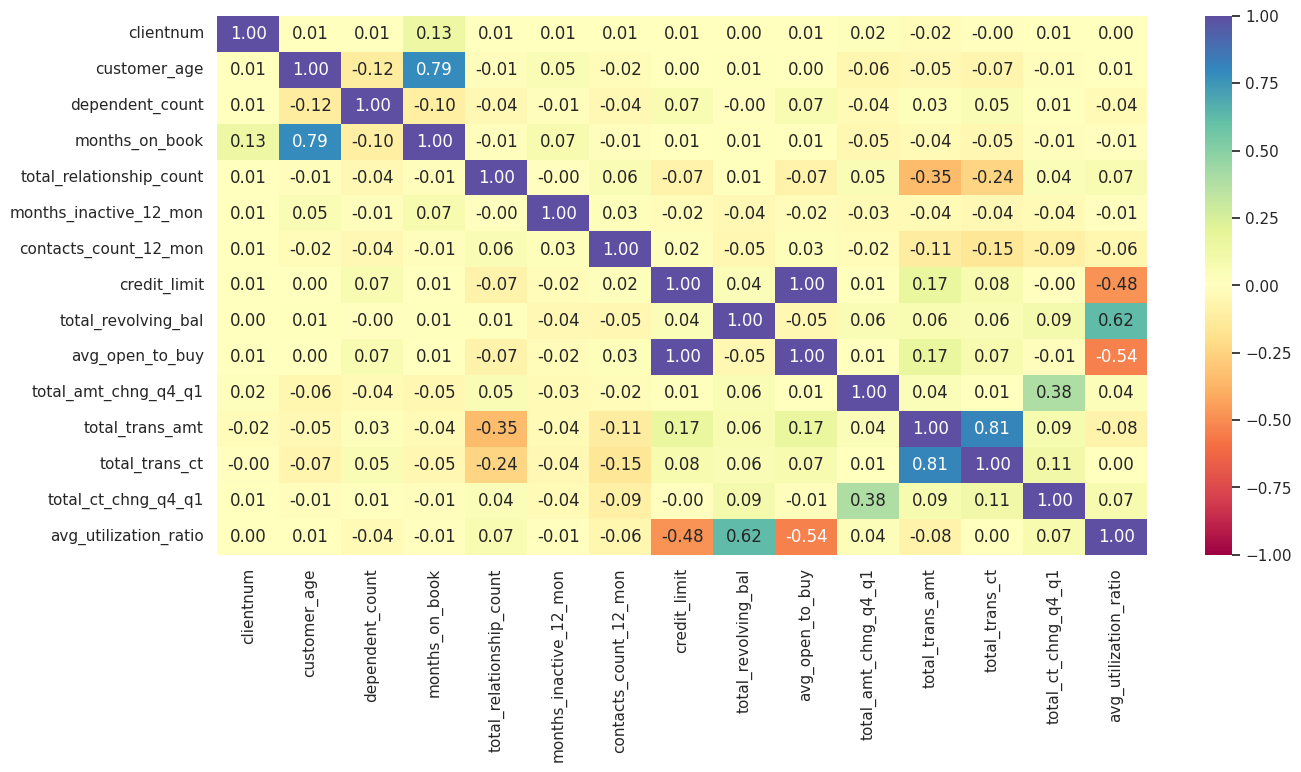

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Preprocessing

**Outlier detection**

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

clientnum                  0.000
customer_age               0.020
dependent_count            0.000
months_on_book             3.812
total_relationship_count   0.000
months_inactive_12_mon     3.268
contacts_count_12_mon      6.211
credit_limit               9.717
total_revolving_bal        0.000
avg_open_to_buy            9.509
total_amt_chng_q4_q1       3.910
total_trans_amt            8.848
total_trans_ct             0.020
total_ct_chng_q4_q1        3.891
avg_utilization_ratio      0.000
dtype: float64

In [ ]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_


# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_



# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_


# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_

# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)

    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')

    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_


# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_



# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_


# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_

# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

#### Train-Test Split

In [ ]:
# creating the copy of the data frame
data1 = data.copy()

In [ ]:
data1.describe(include="all").T

count unique             top     freq  \
clientnum                10127.000    NaN             NaN      NaN   
attrition_flag           10127.000  2.000           0.000 8500.000   
customer_age             10127.000    NaN             NaN      NaN   
gender                       10127      2               F     5358   
dependent_count          10127.000    NaN             NaN      NaN   
education_level              10127      7        Graduate     3128   
marital_status               10127      4         Married     4687   
income_category              10127      6  Less than $40K     3561   
card_category                10127      4            Blue     9436   
months_on_book           10127.000    NaN             NaN      NaN   
total_relationship_count 10127.000    NaN             NaN      NaN   
months_inactive_12_mon   10127.000    NaN             NaN      NaN   
contacts_count_12_mon    10127.000    NaN             NaN      NaN   
credit_limit             10127.000    NaN             NaN      NaN   
total_revolving_bal      10127.000    NaN             NaN      NaN   
avg_open_to_buy          10127.000    NaN             NaN      NaN   
total_amt_chng_q4_q1     10127.000    NaN             NaN      NaN   
total_trans_amt          10127.000    NaN             NaN      NaN   
total_trans_ct           10127.000    NaN             NaN      NaN   
total_ct_chng_q4_q1      10127.000    NaN             NaN      NaN   
avg_utilization_ratio    10127.000    NaN             NaN      NaN   

                                  mean          std           min  \
clientnum                739177606.334 36903783.450 708082083.000   
attrition_flag                     NaN          NaN           NaN   
customer_age                    46.326        8.017        26.000   
gender                             NaN          NaN           NaN   
dependent_count                  2.346        1.299         0.000   
education_level                    NaN          NaN           NaN   
marital_status                     NaN          NaN           NaN   
income_category                    NaN          NaN           NaN   
card_category                      NaN          NaN           NaN   
months_on_book                  35.928        7.986        13.000   
total_relationship_count         3.813        1.554         1.000   
months_inactive_12_mon           2.341        1.011         0.000   
contacts_count_12_mon            2.455        1.106         0.000   
credit_limit                  8631.954     9088.777      1438.300   
total_revolving_bal           1162.814      814.987         0.000   
avg_open_to_buy               7469.140     9090.685         3.000   
total_amt_chng_q4_q1             0.760        0.219         0.000   
total_trans_amt               4404.086     3397.129       510.000   
total_trans_ct                  64.859       23.473        10.000   
total_ct_chng_q4_q1              0.712        0.238         0.000   
avg_utilization_ratio            0.275        0.276         0.000   

                                   25%           50%           75%  \
clientnum                713036770.500 717926358.000 773143533.000   
attrition_flag                     NaN           NaN           NaN   
customer_age                    41.000        46.000        52.000   
gender                             NaN           NaN           NaN   
dependent_count                  1.000         2.000         3.000   
education_level                    NaN           NaN           NaN   
marital_status                     NaN           NaN           NaN   
income_category                    NaN           NaN           NaN   
card_category                      NaN           NaN           NaN   
months_on_book                  31.000        36.000        40.000   
total_relationship_count         3.000         4.000         5.000   
months_inactive_12_mon           2.000         2.000         3.000   
contacts_count_12_mon            2.000         2.000       

In [ ]:
data1.isna().sum()

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [ ]:
# The static variables

# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

In [ ]:
cat_columns = data1.select_dtypes(include="object").columns.tolist()
data1[cat_columns] = data1[cat_columns].astype("category")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["attrition_flag"], axis=1)
y = data1["attrition_flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)


Training data shape: 

 (6075, 20) 

Validation Data Shape: 

 (2026, 20) 

Testing Data Shape: 

 (2026, 20)


**Checking the ratio of labels in the target column for each of the data segments**

In [ ]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.839
1   0.161
Name: attrition_flag, dtype: float64


Validation: 
 0   0.839
1   0.161
Name: attrition_flag, dtype: float64


Test: 
 0   0.840
1   0.160
Name: attrition_flag, dtype: float64


In [ ]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)


# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [ ]:
X_train.head(3)

clientnum  customer_age  dependent_count  months_on_book  \
800   794498733            40                2              21   
498   772735758            44                1              34   
4356  713856708            48                4              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
800                      3.000                   4.000                  3.000   
498                      3.000                   2.000                  0.000   
4356                     2.500                   1.000                  2.000   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
800      20056.000                1.226        18454.000   
498       2885.000                1.450          990.000   
4356      6798.000                1.926         4281.000   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
800                  2.044            0.648           1.278   
498                  1.697            0.524           0.861   
4356                 3.829            1.661           2.194   

      total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
800                 2.249                  0.168         1   
498                 2.667                  1.376         1   
4356                3.717                  0.775         1   

      education_level_Doctorate  education_level_Graduate  \
800                           0                         0   
498                           0                         0   
4356                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
800                             0                              0   
498                             0                              0   
4356                            1                              0   

      education_level_Uneducated  education_level_Unknown  \
800                            0                        1   
498                            0                        1   
4356                           0                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
800                        0                      1                       0   
498                        1                      0                       0   
4356                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
800                             0                            0   
498                             0                            0   
4356                            0                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
800                              0                               0   
498                              0                               0   
4356                             1                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
800                         0                   0                       0   
498                         1                   0                       0   
4356                        0                   0                       0   

      card_category_Silver  
800                      0  
498                      0  
4356                     0

In [ ]:
X_val.head(3)

clientnum  customer_age  dependent_count  months_on_book  \
2894  711251133            37                0              27   
9158  713131158            58                2              46   
9618  794494308            42                3              23   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
2894                     2.500                   2.000                  3.000   
9158                     0.500                   3.000                  1.000   
9618                     1.500                   4.000                  3.000   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
2894     15326.000                0.000        15326.000   
9158     10286.000                0.000        10286.000   
9618     34516.000                1.584        32446.000   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
2894                 5.083            1.148           1.528   
9158                 3.982            3.148           1.639   
9618                 3.860            5.291           2.833   

      total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
2894                4.068                  0.000         1   
9158                3.810                  0.000         1   
9618                2.300                  0.126         1   

      education_level_Doctorate  education_level_Graduate  \
2894                          0                         0   
9158                          0                         0   
9618                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
2894                            0                              1   
9158                            0                              0   
9618                            0                              0   

      education_level_Uneducated  education_level_Unknown  \
2894                           0                        0   
9158                           1                        0   
9618                           1                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
2894                       0                      1                       0   
9158                       0                      1                       0   
9618                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
2894                            0                            0   
9158                            0                            0   
9618                            0                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
2894                             1                               0   
9158                             1                               0   
9618                             0                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
2894                        0                   0                       0   
9158                        0                   0                       0   
9618                        0                   0                       1   

      card_category_Silver  
2894                     0  
9158                     0  
9618                     0

In [ ]:
X_test.head(3)

clientnum  customer_age  dependent_count  months_on_book  \
9760  798788958            32                1              26   
7413  713953383            50                1              36   
6074  713937558            54                2              36   

      total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
9760                     1.000                   3.000                  2.000   
7413                     2.000                   3.000                  2.000   
6074                     1.500                   3.000                  3.000   

      credit_limit  total_revolving_bal  avg_open_to_buy  \
9760      6407.000                0.865         5277.000   
7413      2317.000                0.000         2317.000   
6074      3892.000                0.000         3892.000   

      total_amt_chng_q4_q1  total_trans_amt  total_trans_ct  \
9760                 3.316            5.556           2.583   
7413                 3.219            0.850           1.139   
6074                 3.237            1.658           2.056   

      total_ct_chng_q4_q1  avg_utilization_ratio  gender_M  \
9760                2.544                  0.369         1   
7413                2.190                  0.000         1   
6074                3.215                  0.000         0   

      education_level_Doctorate  education_level_Graduate  \
9760                          0                         0   
7413                          0                         0   
6074                          0                         0   

      education_level_High School  education_level_Post-Graduate  \
9760                            1                              0   
7413                            0                              1   
6074                            1                              0   

      education_level_Uneducated  education_level_Unknown  \
9760                           0                        0   
7413                           0                        0   
6074                           0                        0   

      marital_status_Married  marital_status_Single  marital_status_Unknown  \
9760                       0                      1                       0   
7413                       0                      1                       0   
6074                       1                      0                       0   

      income_category_$40K - $60K  income_category_$60K - $80K  \
9760                            0                            0   
7413                            0                            1   
6074                            1                            0   

      income_category_$80K - $120K  income_category_Less than $40K  \
9760                             1                               0   
7413                             0                               0   
6074                             0                               0   

      income_category_Unknown  card_category_Gold  card_category_Platinum  \
9760                        0                   0                       0   
7413                        0                   0                       0   
6074                        0                   0                       0   

      card_category_Silver  
9760                     0  
7413                     0  
6074                     0

In [ ]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 33) 

Validation Data Shape: 

 (2026, 33) 

Testing Data Shape: 

 (2026, 33)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9723360655737705
Random forest: 1.0
GBM: 0.8739754098360656
Adaboost: 0.8391393442622951
XGBoost: 1.0

Validation Performance:

Bagging: 0.7668711656441718
Random forest: 0.7116564417177914
GBM: 0.8588957055214724
Adaboost: 0.8466257668711656
XGBoost: 0.8895705521472392


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9723, Validation Score: 0.7669, Difference: 0.2055
Random forest: Training Score: 1.0000, Validation Score: 0.7117, Difference: 0.2883
GBM: Training Score: 0.8740, Validation Score: 0.8589, Difference: 0.0151
Adaboost: Training Score: 0.8391, Validation Score: 0.8466, Difference: -0.0075
XGBoost: Training Score: 1.0000, Validation Score: 0.8896, Difference: 0.1104


- GBM has the best performance followed by AdaBoost Model as per the validation performance

### Model Building with Oversampled data


In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 33)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Code to build models on oversampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9968621298293783
Random forest: 1.0
AdaBoost: 0.963326142380859
GradientBoosting: 0.975485389292018
XGBoost: 1.0

Validation Performance:

Bagging: 0.8374233128834356
Random forest: 0.8220858895705522
AdaBoost: 0.8588957055214724
GradientBoosting: 0.8711656441717791
XGBoost: 0.8957055214723927


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9969, Validation Score: 0.8374, Difference: 0.1594
Random forest: Training Score: 1.0000, Validation Score: 0.8221, Difference: 0.1779
AdaBoost: Training Score: 0.9633, Validation Score: 0.8589, Difference: 0.1044
GradientBoosting: Training Score: 0.9755, Validation Score: 0.8712, Difference: 0.1043
XGBoost: Training Score: 1.0000, Validation Score: 0.8957, Difference: 0.1043


- GBM & XGBoost have same best performance on validation followed by Adaboost

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 33)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9897540983606558
Random forest: 1.0
AdaBoost: 0.9528688524590164
GradientBoosting: 0.9815573770491803
XGBoost: 1.0

Validation Performance:

Bagging: 0.9355828220858896
Random forest: 0.9325153374233128
AdaBoost: 0.9570552147239264
GradientBoosting: 0.9570552147239264
XGBoost: 0.9662576687116564


In [ ]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9898, Validation Score: 0.9356, Difference: 0.0542
Random forest: Training Score: 1.0000, Validation Score: 0.9325, Difference: 0.0675
AdaBoost: Training Score: 0.9529, Validation Score: 0.9571, Difference: -0.0042
GradientBoosting: Training Score: 0.9816, Validation Score: 0.9571, Difference: 0.0245
XGBoost: Training Score: 1.0000, Validation Score: 0.9663, Difference: 0.0337


- Adaboost has the best performance followed by GBM model as per the validation performance

After building 15 models, it was observed that both the GBM and Adaboost models, trained on an undersampled dataset, as well as the GBM & XGBoost model trained on an oversampled dataset, exhibited strong performance on both the training and validation datasets.
Sometimes models might overfit after undersampling and oversampling, so it's better to tune the models to get a generalized performance
We will tune these 3 models using the same data (undersampled or oversampled) as we trained them on before

### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning Ada Boost using undersampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50, 110, 25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9457195185766615:
CPU times: user 2.33 s, sys: 148 ms, total: 2.48 s
Wall time: 54.9 s


In [ ]:
tuned_adb = AdaBoostClassifier(n_estimators= 100, learning_rate= 0.05, base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)) ## Code to check the performance on training set
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

Accuracy  Recall  Precision    F1
0     0.972   0.978      0.966 0.972

In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

Accuracy  Recall  Precision    F1
0     0.936   0.957      0.731 0.829

#### Tuning Gradient Boosting using under sampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508372579801151:
CPU times: user 2.65 s, sys: 148 ms, total: 2.8 s
Wall time: 1min 12s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.9,
)## Code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

Accuracy  Recall  Precision    F1
0     0.977   0.984      0.971 0.977

In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

Accuracy  Recall  Precision    F1
0     0.943   0.963      0.753 0.845

#### Tuning Gradient Boosting using over sampled data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9482268275317978:
CPU times: user 5.01 s, sys: 424 ms, total: 5.44 s
Wall time: 3min 17s


In [ ]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.7)

In [ ]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

Accuracy  Recall  Precision    F1
0     0.938   0.935      0.942 0.938

In [ ]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

Accuracy  Recall  Precision    F1
0     0.943   0.963      0.753 0.845

## Model Comparison and Final Model Selection

Training performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Gradient boosting trained with Undersampled data  \
Accuracy                                              0.977   
Recall                                                0.984   
Precision                                             0.971   
F1                                                    0.977   

           Gradient boosting trained with Oversampled data  \
Accuracy                                             0.938   
Recall                                               0.935   
Precision                                            0.942   
F1                                                   0.938   

           AdaBoost trained with Undersampled data  
Accuracy                                     0.972  
Recall                                       0.978  
Precision                                    0.966  
F1                                           0.972

In [104]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting validated with Undersampled data",
    "Gradient boosting validated with Oversampled data",
    "AdaBoost validated with Undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Gradient boosting validated with Undersampled data  \
Accuracy                                               0.943    
Recall                                                 0.963    
Precision                                              0.753    
F1                                                     0.845    

           Gradient boosting validated with Oversampled data  \
Accuracy                                               0.943   
Recall                                                 0.963   
Precision                                              0.753   
F1                                                     0.845   

           AdaBoost validated with Undersampled data  
Accuracy                                       0.936  
Recall                                         0.957  
Precision                                      0.731  
F1                                             0.829

Gradient Boosting model trained with oversampled data has better performance, so let's consider it as the best model.

### Test set final performance

In [ ]:
# Let's check the performance on test set
ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
ada_test

Accuracy  Recall  Precision    F1
0     0.938   0.972      0.730 0.834

The Gradient Boosting model trained on oversampled data has given ~97% recall on the test set
This performance is in line with what we achieved with this model on the train and validation sets
So, this is a generalized model

Feature Importances

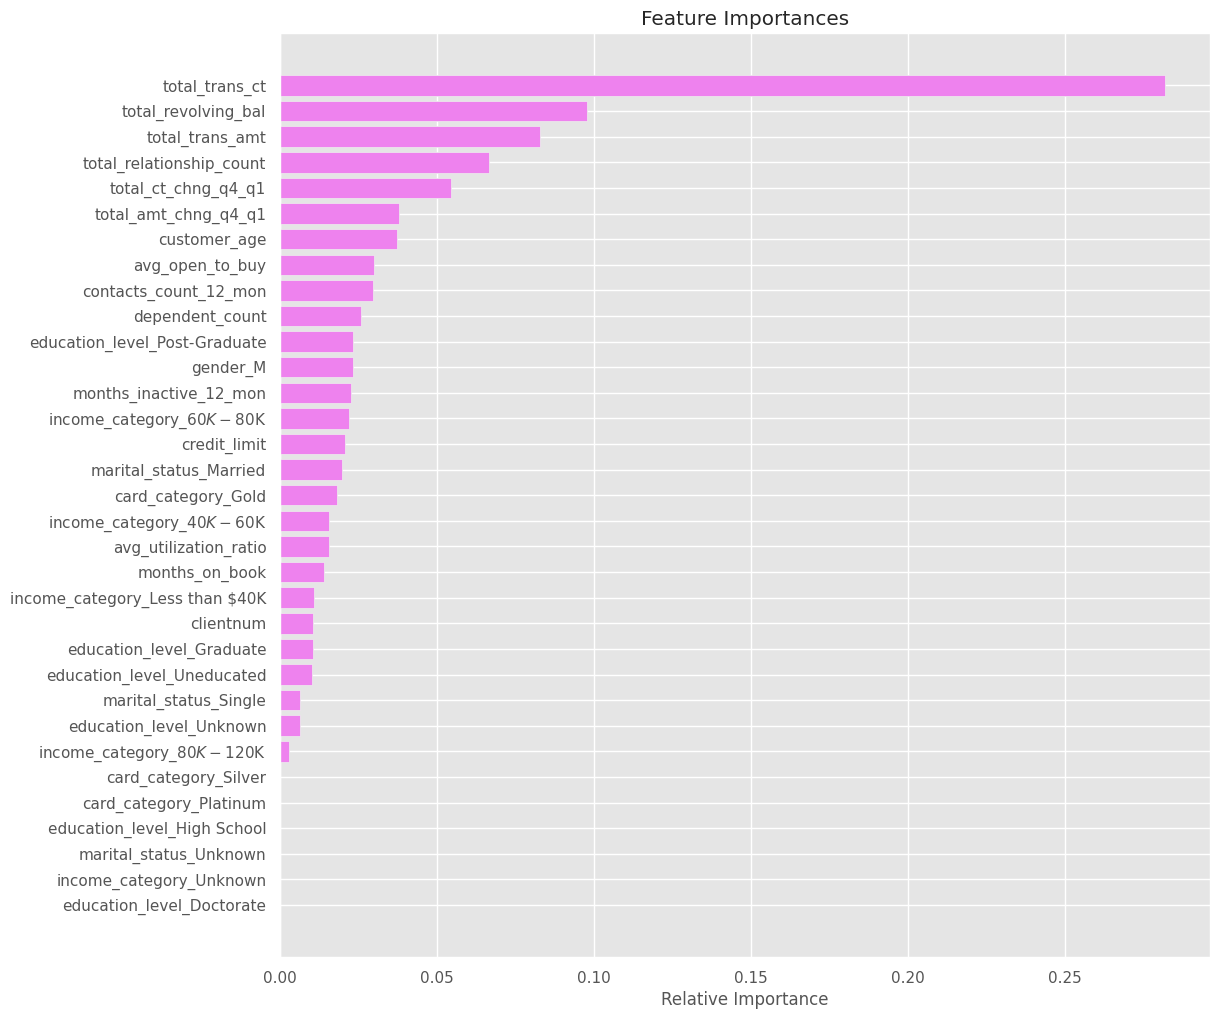

In [ ]:
X_train = pd.DataFrame(X_train)
feature_names = X_train.columns
importances =  model.feature_importances_ ## Code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

The most important features to understand customer credit card churn, are:
Total Transaction Count,
Total Transaction Amount,
Total Revolving Balance,
Total Amount Change Q4 to Q1,
Total Count Change Q4 to Q1,
Total Relationship Count.

All of these features are negatively correlated with the Attrition Flag, meaning, the lower the values of these features, the higher the chances of a customer to attrite


Bank should connect with the customer more often to increase the connect, and provide the customer with various offers and schemes to increase relationships of the customer with the bank


Bank should offer cashback schemes on credit cards, which might encourage the customers on using the credit card more often


Bank should also offer credit limit increase for the customers who are regularly using the credit card. This should increase the credit card spends/transaction amounts.


0% interest EMI on credit card is also another offer that can be provided to customers to encourage the customers buy products of higher cost with credit card, and convert the expenditure to EMI, so that total transaction amount as well as transaction counts would increase. The balance would also revolve nicely.


Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.


With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.

***